# Introduction
'House Prices - Advanced Regression Techniques' is getting started prediction competition. Last time I checked there were more than 7000 teams working on it. Obviously there are many public kernels are available, where every team has presented their solution. My objective with this kernel, is to get best possible predictions and leader baord score **without** ensembling my predictions with other top kernels!

I will be publishing two kernels. 'Linear Model' kernel (this one) contains the data preprocessing steps which are most suitable for getting best possible score from Linear Models like Linear Regression, Lasso etc. 'Tree Model' kernel will contain the data preprocessing steps which are most suitable for getting best possible score from Tree Models like Decsion Tree, Random Forest etc.

# Architecture
In this kernel I will be using linear model as base model to finalize my data preprocessing steps. I tried multiple outliers removal techniques, encoding techniues, scaling/normalization techniques, feature engineering and different type of imputation combination etc. Everytime I tried these techniques I tested it with linear regression model and after many number of trials I have finalized the final data preprocessing steps that resulted in best possible Linear model score.

![Regression_Architecture.png](https://raw.githubusercontent.com/satishgunjal/images/master/Regression_Architecture.png)

I have devided my modeling into five steps. 

### Step1: Linear Models
In this step I used linear models like **Linear Regression**, **Bayesian Ridge Regression**, **Lasso**, **Elastic Net**, **Ridge** etc. For each model I calculated the base model score without hyperparamter tunning and after hyperparameter tunning. I have also submitted the predictions for each model in order to check the Kaggle public leaderboard score. By doing this I can monitor the progress of each step and move forward confidently.

### Step2: Support Vector Machines
I used **SVR(Support Vector Regressor)**. Similar to linear models for SVR also, I calculated the base model score without hyperparamter tunning and after hyperparameter tunning and also submitted the prediction to get Kaggle public leaderboard score.

### Step3: Ensemble Methods
In first two steps I used basic models, from step 3 onward models becomes complex. I used models like **Gradient Boosting Regressor**, **LightGBM Regressor**, **XGB Regressor**. Noted the score with and without hyperparameter tunning and also submitted the prediction to get Kaggle public leaderboard score for each method.

### Step4: Model Stacking
Stacking is an ensemble learning technique to combine multiple regression models via a meta-regressor. At this stage we have good mix of multiple models, now is the best time to use **StackingCVRegressor** to combine all above models to improve the score even further. As expected this model resulted in best possible score!

### Step5: Model Blending
Model blending is the mannual step, where we manually adjust the weight for each model inorder to ensemble the predictions to improve the score. Thumb rle is to give highest weightes to best performning model and lowest to least perfomring model. After few trial and and error I could settle on the weights and manage to top my model stacking score!

# Competition Details
![housesbanner](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)
There are total **79 explanatory variables** and **1460 training examples** describing (almost) every aspect of residential homes in Ames, Iowa. 

## Goal
It is your job to predict the sales price for each house. For each Id in the test set containing 1459 records, you must predict the value of the SalePrice variable. 

## File descriptions
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## Data fields
Brief description of each data field and preliminary analysis. Its long description but its one of the most important step, **PLS DO NOT SKIP THIS**. Apart from official description of each field, I have also added few of my notes based on my understanding of the problem.

For deciding category of year values ref. https://datascience.stackexchange.com/questions/17759/encoding-features-like-month-and-hour-as-categorial-or-numeric

|Data Field|Description|
|:-|:-|
|SalePrice|The property's sale price in dollars. This is the target variable that we're trying to predict.|
|MSSubClass|Identifies the type of dwelling involved in the sale. Its data type is **int64** and values are incremental order starting from 20 upto 190. If we keep it as it is then our model may give more importance to MSSubClass 190 houses over MSSubClass 20 houese. In order to avoid that we will change its data type to '**str**' and treat this as categorical variable. No null values. Nominal data.|
|MSZoning|The general zoning classification. Codes such as 'A'  for Agriculture and  'C' for Commercial are used to represent different zoning classification. No nul values. Nominal data|
|LotFrontage|Linear feet of street connected to property. Null values present. Contains continuous data. Its data type is flost64.|
|LotArea|Lot size in square feet. Null values present. Contains continuous data. Its data type is int64.|
|--|--|
|Street|Type of road access to property. Null values present. Contains ordinal data. Possible values are Grvl (Gravel), Pave (Paved)|
|Alley|Type of alley access to property. Null values present. Contains ordinal data. Possible values are Grvl (Gravel), Pave (Paved), NA (No alley access)|
|LotShape|General shape of property. No null values. Contains ordinal data. Possible values are Reg (Regular), IR1 (Slightly irregular), IR2 (Moderately Irregular), IR3 (Irregular)|
|LandContour|Flatness of the property. No null values. Contains ordinal data. Possible values are Lvl (Near Flat/Level), Bnk (Banked - Quick and significant rise from street grade to building), HLS (Hillside - Significant slope from side to side), Low (Depression)|
|Utilities|Type of utilities available. No null values. Contains ordinal data. Possible values are AllPub (All public Utilities (E,G,W,& S)), NoSewr (Electricity, Gas, and Water (Septic Tank)), NoSeWa (Electricity and Gas Only), ELO (Electricity only)|
|LotConfig|Lot configuration. No null values. Contains ordinal data. Possible values are Inside (Inside lot), Corner	(Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of property), FR3 (Frontage on 3 sides of property)|
|--|--|
|LandSlope|Slope of property. No null values. Contains ordinal data. Possible values are Gtl	(Gentle slope), Mod (Moderate slope, Sev (Severe Slope)|
|Neighborhood|Physical locations within Ames city limits. No null values. Contains nominal data. Possible values are Blmngtn (Bloomington Heights), Blueste (Bluestem), BrDale (Briardale), BrkSide (Brookside) etc|
|Condition1|Proximity to various conditions. No null values. Contains nominal data. Possible values are Artery	(Adjacent to arterial street), Feedr (Adjacent to feeder street	), Norm (Normal) etc|
|Condition2|Proximity to various conditions (if more than one is present). No null values. Contains nominal data. Possible values are Artery	(Adjacent to arterial street), Feedr (Adjacent to feeder street	), Norm (Normal) etc|
|BldgType|Type of dwelling. No null values. Contains ordinal data. Possible values are 1Fam (Single-family Detached), 2FmCon (Two-family Conversion; originally built as one-family dwelling), Duplx (Duplex), TwnhsE (Townhouse End Unit), TwnhsI (Townhouse Inside Unit)|
|--|--|
|HouseStyle|Style of dwelling. No null values. Contains nominal data. Possible values are 1Story (One story), 1.5Fin	(One and one-half story: 2nd level finished), 1.5Unf (One and one-half story: 2nd level unfinished), 2Story (Two story) etc|
|OverallQual|Rates the overall material and finish of the house. No null values. Contains ordinal data. We will convert its data type from int64 to category. Possible values are 10 (Very Excellent), 9 (Excellent), 8 (Very Good), 7 (Good), 6 (Above Average), 5 (Average), 4 (Below Average), 3 (Fair), 2 (Poor), 1 (Very Poor)|
|OverallCond|Rates the overall condition of the house. No null values. Contains ordinal data. We will convert its data type from int64 to category. Possible values are 10 (Very Excellent), 9 (Excellent), 8 (Very Good), 7 (Good), 6 (Above Average), 5 (Average), 4 (Below Average), 3 (Fair), 2 (Poor), 1 (Very Poor)|
|YearBuilt|Original construction date. No null values. Contains continuous data.|
|YearRemodAdd|Remodel date (same as construction date if no remodeling or additions). No null values. Contains continuous data.|
|--|--|
|RoofStyle|Type of roof. No null values. Contains ordinal data. We will convert its data type from object to category. Possible values are Flat	(Flat), Gable (Gable), Gambrel	 (Gabrel (Barn)), Hip (Hip), Mansard (Mansard), Shed (Shed)|
|RoofMatl|Roof material. No null values. Contains ordinal data. Possible values are ClyTile	(Clay or Tile), CompShg	(Standard (Composite) Shingle), Membran	(Membrane), Metal (Metal), Roll	(Roll), Tar&Grv	(Gravel & Tar), WdShake	(Wood Shakes), WdShngl (Wood Shingles). Ref. https://absoluteroofing.com/cms34/index.php/roofing/roofing-types.html|
|Exterior1st|Exterior covering on house. No null values. Contains nominal data. Possible values are AsbShng	(Asbestos Shingles), AsphShn (Asphalt Shingles), BrkComm (Brick Common) etc|
|Exterior2nd|Exterior covering on house (if more than one material). No null values. Contains nominal data. Possible values are AsbShng	(Asbestos Shingles), AsphShn (Asphalt Shingles), BrkComm (Brick Common) etc|
|MasVnrType|Masonry veneer type. Null values present. Contains nominal data. Possible values are BrkCmn	(Brick Common), BrkFace	(Brick Face), CBlock (Cinder Block), None (None), Stone (Stone)|
|--|--|
|MasVnrArea|Masonry veneer area in square feet. Null values present. Contains continuous value. Its data type is float64.|
|ExterQual|Evaluates the quality of the material on the exterior. Null values present. Contains ordidnal data. Possible values are Ex	(Excellent), Gd	(Good), TA (Average/Typical), Fa (Fair), Po (Poor)| 
|ExterCond|Present condition of the material on the exterior. No null values. Ordinal data. Possible values are Ex (Excellent), Gd (Good), TA (Average/Typical), Fa (Fair), Po (Poor).|
|Foundation|Type of foundation. No null values. Nominal data. Possible values are BrkTil (Brick & Tile), CBlock (Cinder Block), PConc (Poured Contrete), Slab (Slab), Stone (Stone), Wood (Wood).|
|BsmtQual|Height of the basement. Null values presents. Ordinal data. Possible values are Ex (Excellent (100+ inches)	), Gd (Good (90-99 inches)), TA (Typical (80-89 inches)), Fa (Fair (70-79 inches)), Po (Poor(<70 inches), NA (No Basement).|
|--|--|
|BsmtCond|General condition of the basement. Null values presents. Ordinal data. Possible values are Ex (Excellent), Gd (Good), TA (Typical - slight dampness allowed), Fa (Fair - dampness or some cracking or settling), Po (Poor - Severe cracking, settling, or wetness), NA (No Basement). We will change its data type to category.|
|BsmtExposure|Walkout or garden level basement walls. Null values presents. Ordinal data. Possible values are Gd (Good Exposure), Av (Average Exposure), Mn (Mimimum Exposure), No (No Exposure), NA (No Basement).|
|BsmtFinType1|Quality of basement finished area. Null values presents. Ordinal data. Possible values are GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters	), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinshed), NA (No Basement).|
|BsmtFinSF1|Type 1 finished square feet. Its data type is int64 and it contains continuous values. No null values. It provides extra information about feature BsmtFinType1.|
|BsmtFinType2|Quality of second basement finished area (if present). Null values presents. Ordinal data. Possible values are GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters,  Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinshed), NA (No Basement).|
|--|--|
|BsmtFinSF2|Type 2 finished square feet. Its data type is int64 and it contains continuous values. No null values. It provides extra information about feature BsmtFinType2.|
|BsmtUnfSF|Unfinished square feet of basement area. No null values. Its data type is int64 and it contains continuous values|
|TotalBsmtSF|Total square feet of basement area. No null values. Its data type is int64 and it contains continuous values|
|Heating|Type of heating. No null values. Nominal data. Possible values are Floor (Floor Furnace), GasA (Gas forced warm air furnace), GasW (Gas hot water or steam heat), Grav (Gravity furnace), OthW (Hot water or steam heat other than gas), Wall (Wall furnace).|
|HeatingQC|Heating quality and condition. No null values. Ordinal data. Possible values are Ex (Excellent), Gd (Good), TA (Average/Typical), Fa (Fair), Po (Poor).|
|--|--|
|CentralAir|Central air conditioning. No null values. Nominal data. Possible values are N (No), Y (Yes).|
|Electrical|Electrical system. Null values present. Nominal data. Possible values are SBrkr (Standard Circuit Breakers & Romex), FuseA (Fuse Box over 60 AMP and all Romex wiring (Average)), FuseF (60 AMP Fuse Box and mostly Romex wiring (Fair)), FuseP (60 AMP Fuse Box and mostly knob & tube wiring (poor)), Mix (Mixed).|
|1stFlrSF|First Floor square feet. No null values. Its data type is int64 and it contains continuous values.|
|2ndFlrSF|Second floor square feet. No null values. Its data type is int64 and it contains continuous values.|
|LowQualFinSF|Low quality finished square feet (all floors). No null values. Its data type is int64 and it contains continuous values.|
|--|--|
|GrLivArea|Above grade (ground) living area square feet. No null values. Its data type is int64 and it contains continuous values.|
|BsmtFullBath|No of basement full bathrooms. No null values. Its data type is int64. Since no of bathrooms will have positive effect on sale price, no need to change here.|
|BsmtHalfBath|Basement half bathrooms. No null values. Its data type is int64. Since no of half bathrooms will have positive effect on sale price, no need to change here.|
|FullBath|Full bathrooms above ground. No null values. Its data type is int64. Since no of full bathrooms above ground will have positive effect on sale price, no need to change here.|
|HalfBath|Half baths above ground. No null values. Its data type is int64. Since no of half bathrooms above ground will have positive effect on sale price, no need to change here.|
|--|--|
|BedroomAbvGr|Number of bedrooms above basement level. No null values. Its data type is int64. Since no of bedrooms above ground will have positive effect on sale price, no need to change here.|
|KitchenAbvGr|Number of kitchens above ground. No null values. Its data type is int64. Since no of kitchens above ground will have positive effect on sale price, no need to change here.|
|KitchenQual|Kitchen quality. No null values. Ordinal data. Possible values are Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor).|
|TotRmsAbvGrd|Total rooms above grade (does not include bathrooms). No null values. Its data type is int64. Since no of rooms above ground will have positive effect on sale price, no need to change here.|
|Functional|Home functionality rating. Assume typical unless deductions are warranted. No null values. Ordinal data. Possible values are Typ (Typical Functionality), Min1 (Minor) Deductions 1, Min2 (Minor Deductions 2), Mod (Moderate Deductions), Maj1 (Major Deductions 1), Maj2 (Major Deductions 2), Sev (Severely Damaged), Sal (Salvage only).|
|--|--|
|Fireplaces|Number of fireplaces. No null values. Its data type is int64. Since no of fire palces will have positive effect on sale price, no need to change here.|
|FireplaceQu|Fireplace quality. Null values present. Ordinal data. Possible values are Ex (Excellent - Exceptional Masonry Fireplace), Gd (Good - Masonry Fireplace in main level), TA (Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement), Fa (Fair - Prefabricated Fireplace in basement), Po (Poor - Ben Franklin Stove), NA (No Fireplace)|
|GarageType|Garage location. Null values present. Contains ordinal data. Possible value are 2Types (More than one type of garage), Attchd (Attached to home), Basment (Basement Garage), BuiltIn (Built-In (Garage part of house - typically has room above garage)), CarPort (Car Port), Detchd	(Detached from home), NA (No Garage)|
|GarageYrBlt|Year garage was built. Null values present. Contains continuous data. Built year will definalty have effect on Sale price. We can keep it, as it is or use label encoding.|
|GarageFinish|Interior finish of the garage. Null values present. Contains ordinal data. Possible values are Fin (Finished), RFn (Rough Finished	), Unf (Unfinished), NA (No Garage).|
|--|--|
|GarageCars|Size of garage in car capacity. No null values. Contains descrete data. Possible values are 0 to 4.|
|GarageArea|Size of garage in square feet. No null values. Contains continuous data. Its data type is int64.|
|GarageQual|Garage quality. Null values present. Contains ordinal data. Possible values are Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage).|
|GarageCond|Garage condition. Null values present. Contains ordinal data. Possible values are Ex	(Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage)|
|PavedDrive|Paved driveway. No null values. Contains ordinal data. Possible values are Y (Paved), P (Partial Pavement), N (Dirt/Gravel)|
|--|--|
|WoodDeckSF|Wood deck area in square feet. No null values. Contains continuous data. Its data type is int64.|
|OpenPorchSF|Open porch area in square feet. No null values. Contains continuous data. Its data type is int64.|
|EnclosedPorch|Enclosed porch area in square feet. No null values. Contains continuous data. Its data type is int64.|
|3SsnPorch|Three season porch area in square feet. No null values. Contains continuous data. Its data type is int64.|
|ScreenPorch|Screen porch area in square feet. No null values. Contains continuous data. Its data type is int64.|
|--|--|
|PoolArea|Pool area in square feet. No null values. Contains continuous data. Its data type is int64.|
|PoolQC|Pool quality. Null values present. Contains ordinal data. Possible values are Ex	(Excellent), Gd (Good), TA (Average/Typical), Fa (Fair), NA (No Pool)|
|Fence|Fence quality. Null values present. Contains ordinal data. Possible values are GdPrv (Good Privacy), MnPrv (Minimum Privacy, GdWo (Good Wood), MnWw (Minimum Wood/Wire), NA (No Fence)|
|MiscFeature|Miscellaneous feature not covered in other categories. Null values present. Contains nominal data. Possible values are Elev	(Elevator), Gar2 (2nd Garage (if not described in garage section)), Othr (Other), Shed (Shed (over 100 SF)), TenC (Tennis Court), NA (None)|
|MiscVal|$ Value of miscellaneous feature. No null values. Contains continuous data. Its data type is int64.|
|--|--|
|MoSold|Month Sold. No null values. Will change its data type from int64 to str. Contains nominal data.|
|YrSold|Year Sold. No null values. Will change its data type from int64 to str. Contains nominal data.|
|SaleType|Type of sale. No null values. Contains nominal data. Possible values are WD (Warranty Deed - Conventional), CWD (Warranty Deed - Cash), VWD (Warranty Deed - VA Loan), New (Home just constructed and sold), COD (Court Officer Deed/Estate), Con (Contract 15% Down payment regular terms), ConLw	(Contract Low Down payment and low interest), ConLI (Contract Low Interest), ConLD (Contract Low Down), Oth (Other)|
|SaleCondition|Condition of sale. No null values. Contains nominal data. Possible values are Normal (Normal Sale), Abnorml (Abnormal Sale -  trade, foreclosure, short sale), AdjLand	(Adjoining Land Purchase), Alloca (Allocation - two linked properties with separate deeds, typically condo with a garage unit), Family (Sale between family members), Partial (Home was not completed when last assessed (associated with New Homes))|
|||

## Metric
Submissions are evaluated on **Root-Mean-Squared-Error (RMSE)** between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## Submission File Format
The file should contain a header and have the following format:

|Id|SalePrice|
|:-|:-|
|1461|169000.1|
|1462|187724.1233|
|1463|175221|
|...|...|
|...|...|
|2918|115208|
|2919|218955|

# What is Root Mean Square Error (RMSE)

* Before we even start with solution, lets first understand what RMSE metric means. Root Mean square is the standard deviation of the residuals. Now let's understand what Standard deviation and residuals are.
* **Standard deviation**: Standard deviation is a measure of how spread out numbers are. Its formula is the square root of the Variance. Variance is defined as the average of the squared differences from the Mean. In the below formula of standard deviation 'xi'= numbers,  'μ'= Mean of the numbers and 'N' = Total number of values

$$σ = \sqrt {\frac{1}{N} \sum_{i=1}^{N} ({x_{i}} - μ)^2}$$

* **Residuals**:  Residuals are a measure of how far from the regression line data points are. Residuals are nothing but prediction error, we can find it by subtracting the predicted value from actual value.
![Residuals](https://raw.githubusercontent.com/satishgunjal/images/master/Square_Error_Function.png)

* So in order to get RMSE we will use Standard deviation formula but instead of square root of variance we wil calculate the square root of average of squared residuals.

$$RMSE = \sqrt {\frac{1}{N} \sum_{i=1}^{N} (\hat{y_{i}} - y_{i})^2}$$
 

* Standard deviation is used to measure the spread of data around the mean, while RMSE is used to measure distance between predicted and actual values.
* RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
* Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE is most useful when large errors are particularly undesirable. Note that, as per competition rules submissions are evaluated on the logarithm of the predicted value and the logarithm of the observed sales price. Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.
* **What does RMSE indicate?**: 
    * It indicates the absolute fit of the model to the data.
    * Provides average model prediction error in units of the variable of interest.
    * They are negatively-oriented scores, which means lower values are better.

# Import Libraries
Import libraries required for data processing and feature engineering. We will again import required libraries during modeling steps.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.special import boxcox1p
import warnings

In [2]:
# Global Settings
warnings.filterwarnings("ignore") # To ignore warnings
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting float output to 3 decimal points
rcParams['figure.figsize'] = 12,6 # Default figure size in inches

In [3]:
#Input data files

print('Input data files,')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Input data files,
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Load Data
* Load the training and testing datasets into pandas dataframe.
* We have total 1460 training examples and 1459 test examples.
* Total number of attributes/features equals 81, which includes Id and SalePrice.
* Test data dont contain the target variable 'SalePrice'.

In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(f'Shape of traning data= {train.shape}')
#Show first 5 training exampls
train.head()

Shape of traning data= (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
print(f'Shape of test data= {test.shape}')
test.head()

Shape of test data= (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Exploratory Data Analysis

## Removing Unnecessory Attributes
Since Id column from train and test data is not usefull for any analysis we will remove it. Having only required data for analysis reduces computing resources requirement and increases the speed.

In [6]:
train.drop('Id', inplace= True, axis=1) # Drop column and update same dataframe
test.drop('Id', inplace= True, axis= 1)
print(f'After dropping Id feature, shape of train data: {train.shape}, test data: {test.shape}')

After dropping Id feature, shape of train data: (1460, 80), test data: (1459, 79)


## Correlation Check
* Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target.
* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.
* Lets create correlation map to see how our **numeric** features are correlated with SalePrice
* We will use **Pearson's correlation**. It is utilized we you have two quantitative variables and you wish to see if there is a linear relationship between those variables.

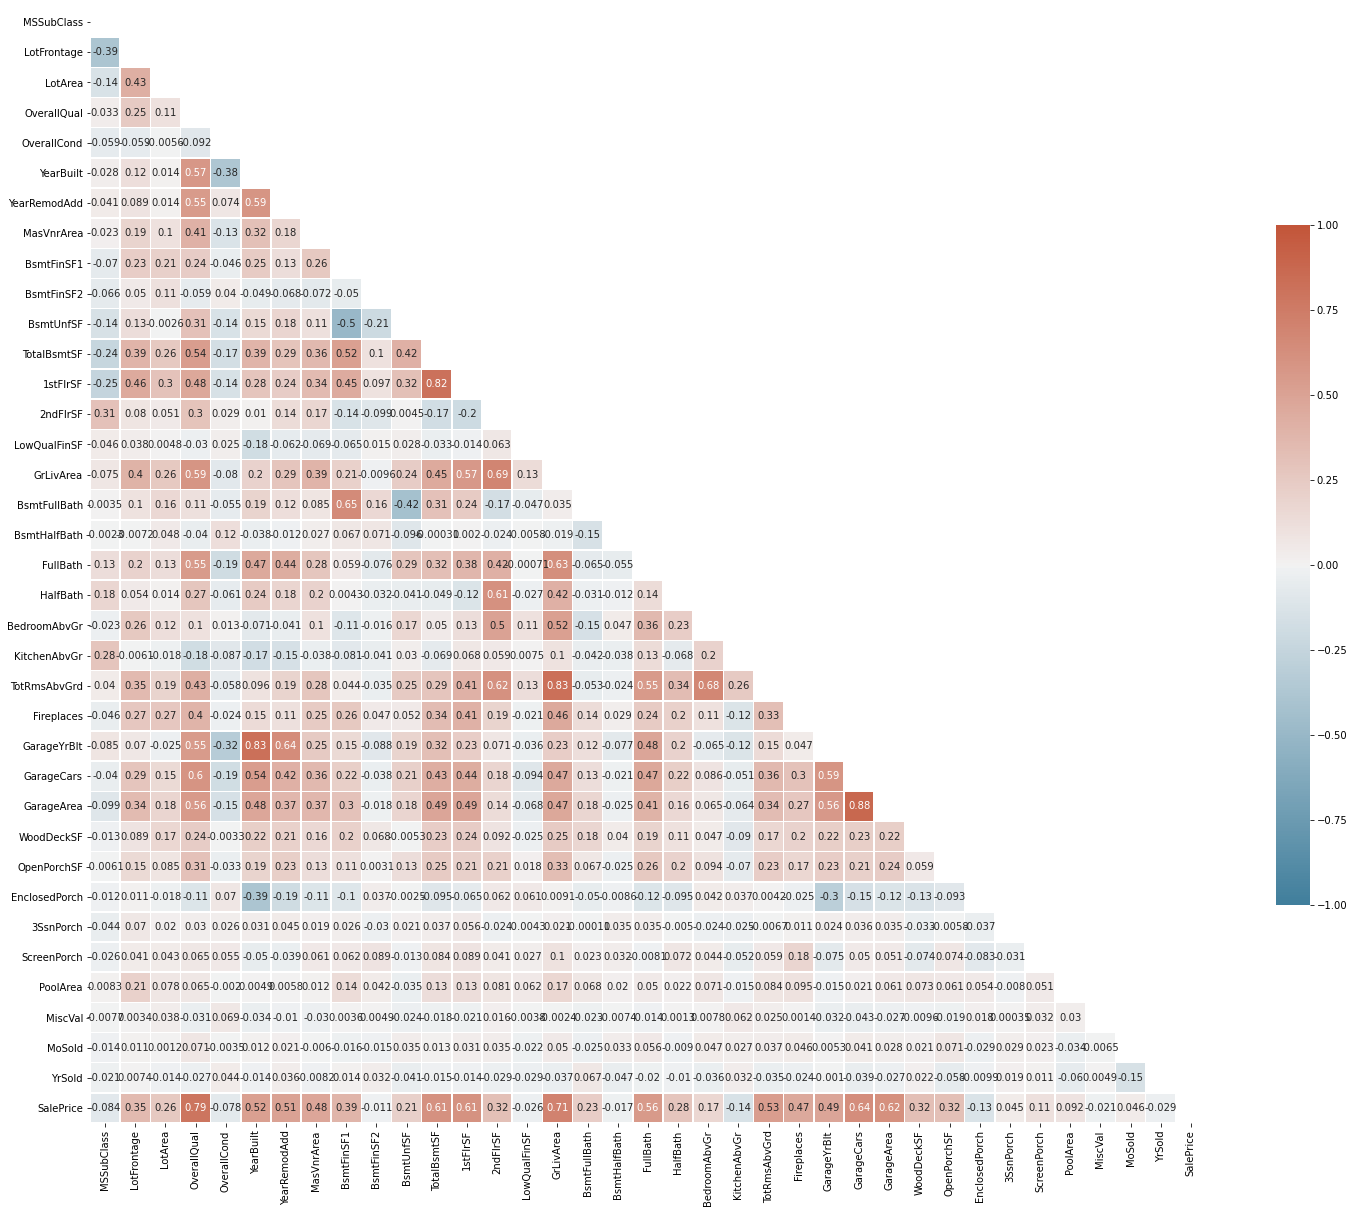

In [7]:
train_corr = train.corr(method= 'pearson') # Compute pairwise correlation of columns, excluding NA/null values. pearson : standard correlation coefficient
f, ax = plt.subplots(figsize=(25, 25))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(train_corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(train_corr, vmin=-1, vmax=1, mask=mask, cmap=cmap, center=0, annot = True, square=True, linewidths=.5, cbar_kws= {"shrink": .5, 'orientation': 'vertical'}) 

**In above correlation map,**
* -1 indicates a perfectly negative linear correlation between two variables.
* 0 indicates no linear correlation between two variables.
* 1 indicates a perfectly positive linear correlation between two variables.

**Important linear correlation between features and SalePirce**
* Features correlated with SalePrice are OverallQual(0.79), YearBuilt(0.52), YearRemodAdd(0.51), TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64), GarageArea(0.62)
* Features not correlated with SalePrice are MSSubClass(-0.084), OverallCond(-0.078), BsmtFinSF1(-0.011), LowQualFinSF(-0.026), BsmtHalfBath(-0.017), KitchenAbvGrd(-0.14), EnclosedPorch(-0.13), MiscVal(-0.021), YrSold(-0.029)

## Multicollinearity Analysis

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. Below are few of the multicollinear features based on correlation matrix.

* Features correlated with OverallQual are YearBuilt(0.57), YearRemodAdd(0.55), TotalBsmtSF(0.54), GrLivArea(0.59), FullBath(0.55), GarageYrBuilt(0.55), GarageCars(0.6), GarageArea(0.56)
* Features correlated with YearBuilt are YearRemodAdd(0.59), GarageYrBuilt(0.83), GarageCars(0.54)
* Features correlated with YearRemodAdd is GarageYrBuilt(0.64)
* Features correlated with BsmtFinSF1 are TotalBsmtSF(0.52), BsmtFullBath(0.65)
* Features correlated with TotalBsmtSF is 1stFlrSF(0.82)
* Features correlated with 1stFlrSF is GrLivArea(0.57)
* Features correlated with 2stFlrSF are GrLivArea(0.69), HalfBath(0.61), BedroomAbvGr(0.5), TotRmsAbvGrd(0.62)
* Features correlated with GrLivArea are FullBath(0.63), BedroomAbvGr(0.52), TotRmsAbvGrd(0.83)
* Features correlated with FullBathc is TotRmsAbvGrd(0.55)
* Features correlated with BedroomAbvGr is TotRmsAbvGrd(0.68)
* Features correlated with GarageYrBuilt are GarageCars(0.59), GarageArea(0.56)
* Features correlated with GarageCars is GarageArea(0.88)

Note: Correlation is only an indication of presence of multicollinearity, removing features only on the basis of the correlation can lead to a loosing valuable information. The best way to identify the multicollinearity is to calculate the Variance Inflation Factor (VIF) for every feature in the Dataset. Other way is to use regression techniques like  Ridge or Lasso, in these models we use extra lambda value which penalizes some of the coefficients for particular columns which in turn reduces the effect of multicollinearity.

Lets visualize these correlations.

## OverallQuall vs SalePrice 
* Correlation coefficient is 0.79
* As we know OverallQual rates the overall material and finish of the house. It contains ordinal data. Possible values are 10 (Very Excellent), 9 (Excellent), 8 (Very Good), 7 (Good), 6 (Above Average), 5 (Average), 4 (Below Average), 3 (Fair), 2 (Poor), 1 (Very Poor)
* Since we have ordinal categorical data, we can use Box plot and Violin plot for visualization
    - A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”)
    - While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data.*

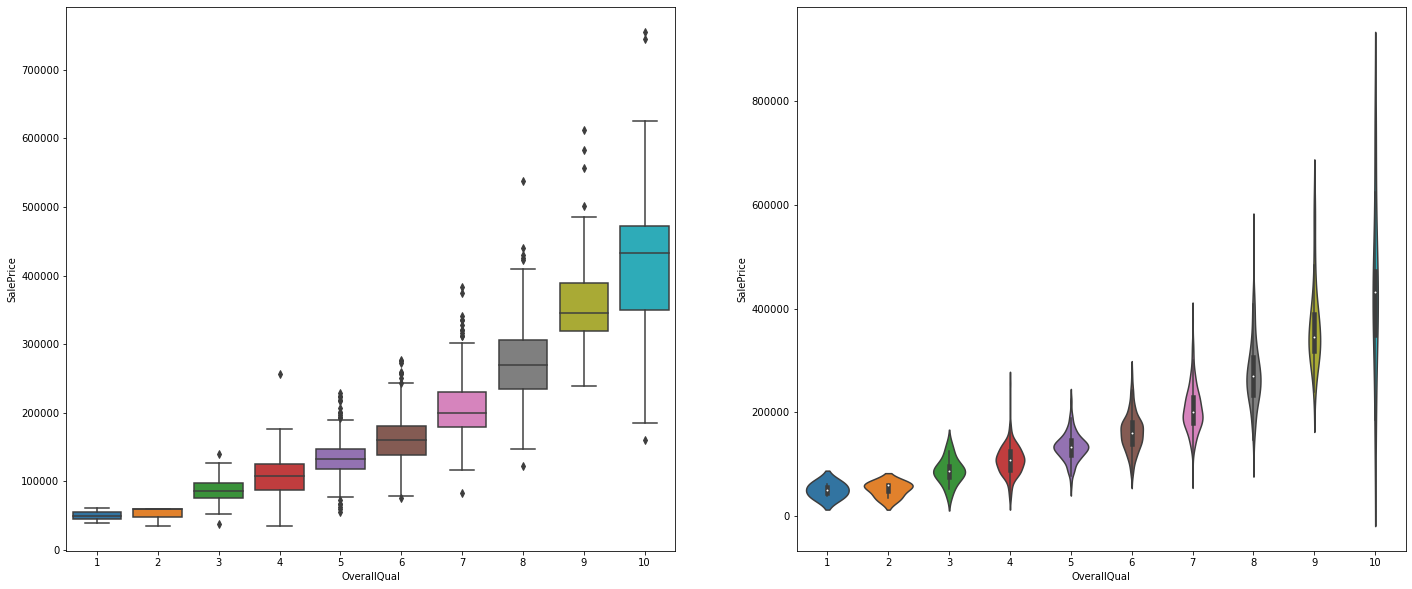

In [8]:
figure, ax = plt.subplots(1,2, figsize = (24,10))
sns.boxplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=train, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

# todo- add legend of > 1- Very poor quality...10- Very Excellent

From above plots its clear that SalePrice linearly dependent on OveralQual. Also from Violin plot we can say that distribution of data is not multimodal(more than one peak). We can also see that for different OverallQual values there are few outliers.

## YearBuilt, YearRemodAdd vs SalePrice
* Correlation coefficient for YearBuilt and YearRemodAdd is 0.52 and 0.51 respectively.
* It represent the original construction date and remodel date.
* Since it contains year values, we will use 'barplot' to plot data and visualize.

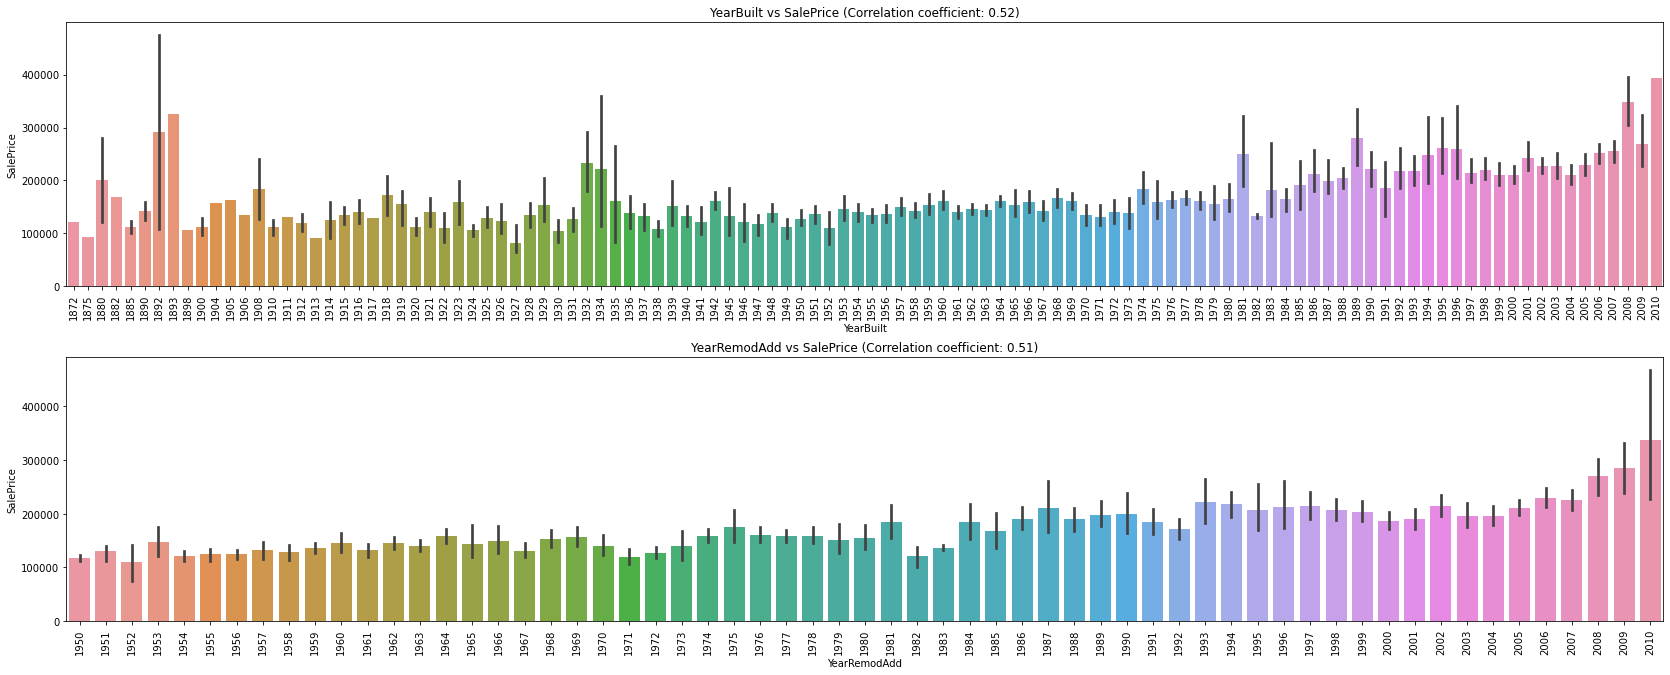

In [9]:
figure, ax = plt.subplots(2,1, figsize = (24,10))
figure.tight_layout(pad=5.0) # To increase the space between subplots

sns.barplot(ax = ax[0], x='YearBuilt', y="SalePrice", data = train)
ax[0].set(xlabel="YearBuilt", ylabel = "SalePrice")
ax[0].set_title('YearBuilt vs SalePrice (Correlation coefficient: 0.52)')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90)

sns.barplot(ax = ax[1], x='YearRemodAdd', y="SalePrice", data = train)
ax[1].set(xlabel="YearRemodAdd", ylabel = "SalePrice")
ax[1].set_title('YearRemodAdd vs SalePrice (Correlation coefficient: 0.51)')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90)

plt.show()

# Can also use regplot
#figure, ax = plt.subplots(1,2, figsize = (24,6))
#sns.regplot(data=train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
#ax[0].set_title('YearBuilt vs SalePrice (Correlation coefficient: 0.52)', fontsize = 12)

#sns.regplot(data=train, x = 'YearRemodAdd', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1])
#ax[1].set_title('YearRemodAdd vs SalePrice (Correlation coefficient: 0.51)', fontsize = 12)

#plt.show()

As we can see from above regression plot there is linear relationaship between SalePrice and YearBuilt and YearRemodAdd but there are many exceptions as well. Few important points are as below,
* Small error bar indicates the low spread of the data around the mean value of SalePrice, similarly large bar indicate the alrge spread.
* No error bar means there only one record for that year value.


## TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea vs SalePrice
* Correlation coefficient is: TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), GarageArea(0.62)
* TotalBsmtSF:	Total square feet of basement area. No null values. Its data type is int64 and it contains continuous values
* 1stFlrSF:	First Floor square feet. No null values. Its data type is int64 and it contains continuous values.
* GrLivArea: Above grade (ground) living area square feet. No null values. Its data type is int64 and it contains continuous values.
* GarageArea: Size of garage in square feet. No null values. Contains continuous data. Its data type is int64.
* Since all above features contains surface area i.e. continuous values, we will use 'regplot' to plot data and visualize the linear regression model fit.

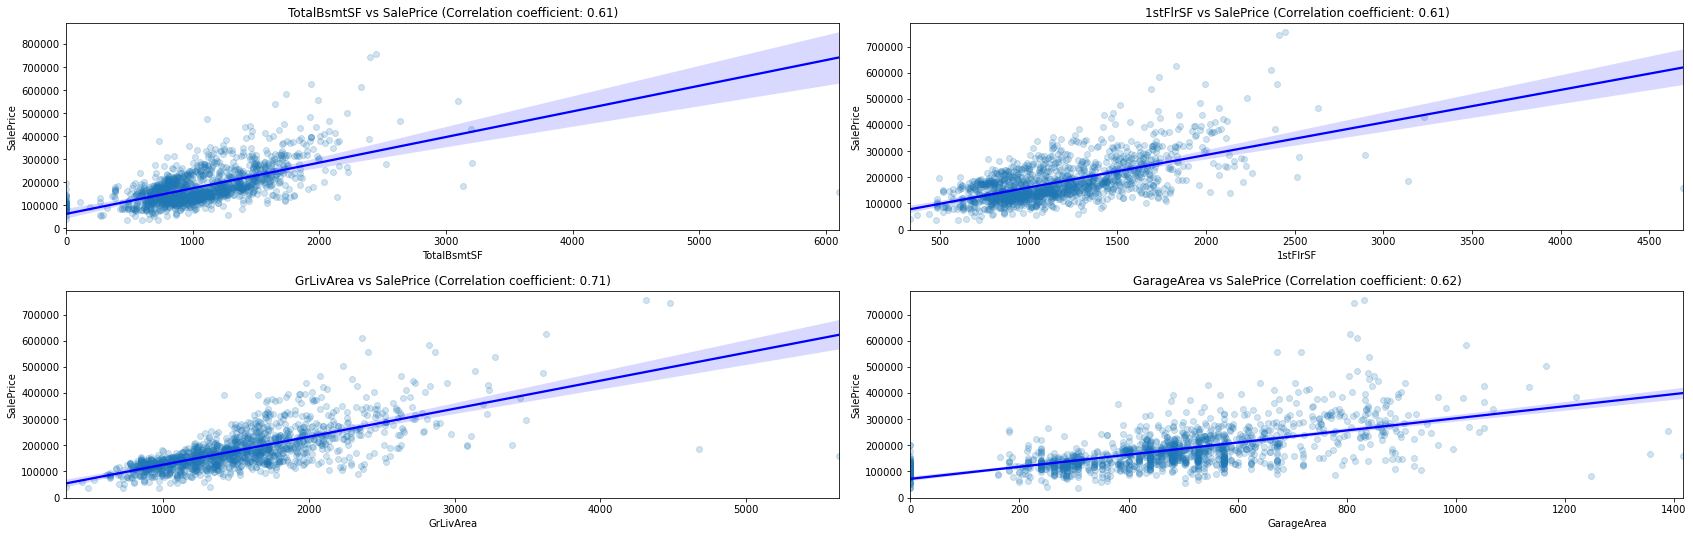

In [10]:
figure, ax = plt.subplots(2,2, figsize = (24,8))
figure.tight_layout(pad=4.0) # To increase the space between subplots

sns.regplot(data=train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,0]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
ax[0,0].set_title('TotalBsmtSF vs SalePrice (Correlation coefficient: 0.61)', fontsize = 12)

sns.regplot(data=train, x = '1stFlrSF', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[0,1])
ax[0,1].set_title('1stFlrSF vs SalePrice (Correlation coefficient: 0.61)', fontsize = 12)

sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,0])
ax[1,0].set_title('\nGrLivArea vs SalePrice (Correlation coefficient: 0.71)', fontsize = 12)

sns.regplot(data=train, x = 'GarageArea', y='SalePrice', scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[1,1])
ax[1,1].set_title('\nGarageArea vs SalePrice (Correlation coefficient: 0.62)', fontsize = 12)

plt.show()

As we can see from above graphs that TotalBsmtSF, 1stFlrSF, GrLivArea and GarageArea has relationship with SalePrice.

## FullBath, TotRmsAbvGrd, GarageCars Vs SalePrice
* Correlation coefficient is: FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64)
* All feature contains discrete numerical data. We will use Boxplot and Violin plot for visulaization.
* FullBath: Full bathrooms above ground. No null values. Its data type is int64. 
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms). No null values. Its data type is int64.
* GarageCars: Size of garage in car capacity. No null values. Contains nominal data.

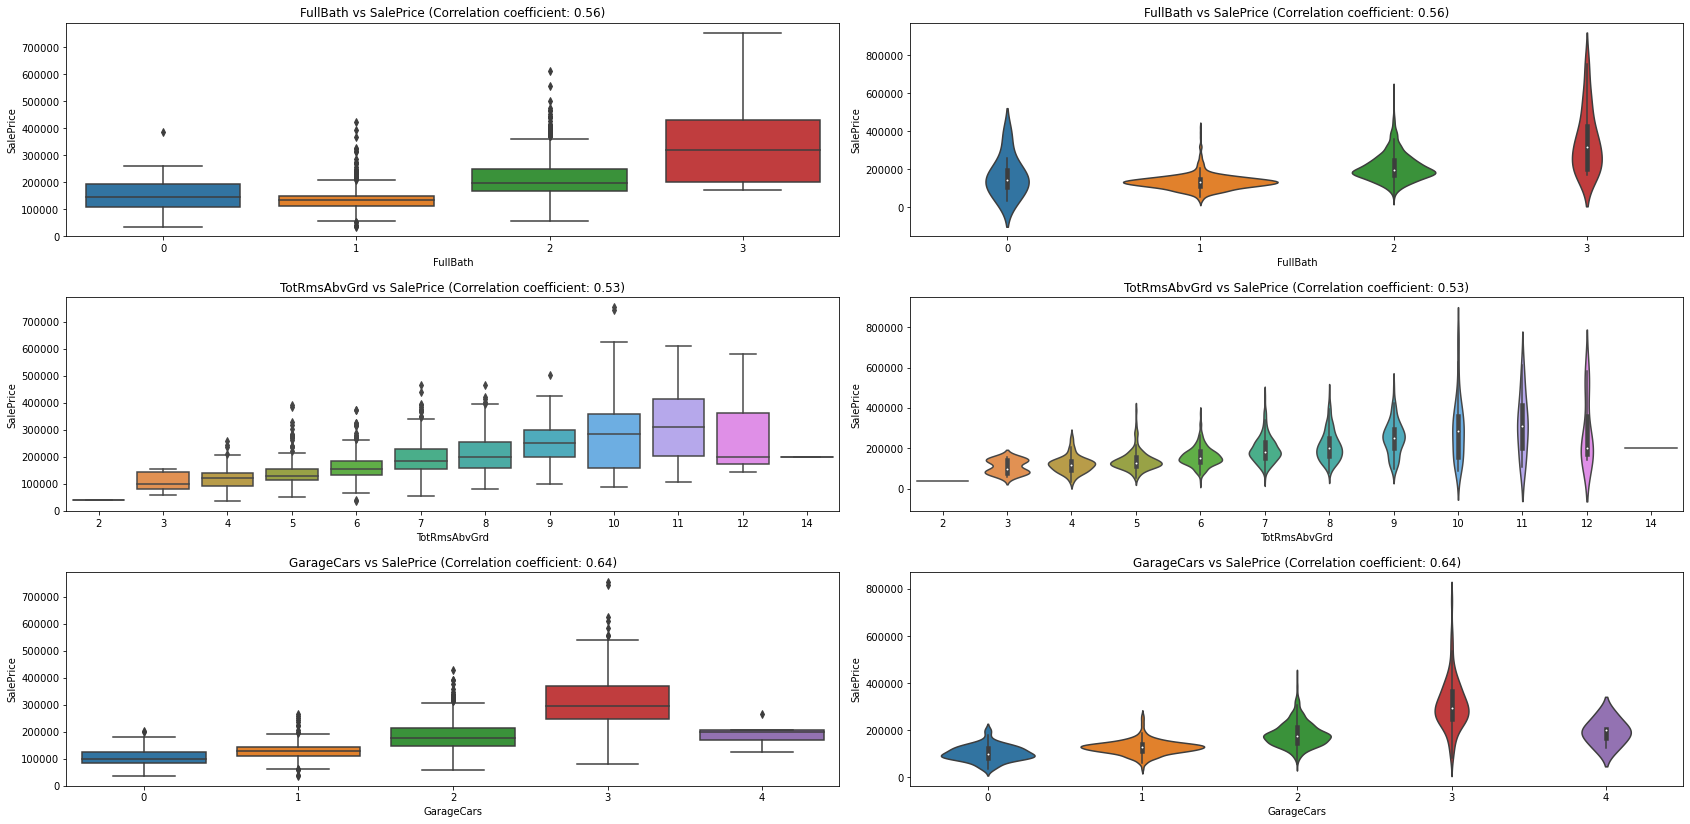

In [11]:
figure, ax = plt.subplots(3,2, figsize = (24,12))
figure.tight_layout(pad=4.0) # To increase the space between subplots

sns.boxplot(data=train, x = 'FullBath', y='SalePrice', ax = ax[0,0])
sns.violinplot(data=train, x = 'FullBath', y='SalePrice', ax = ax[0,1])
ax[0,0].set_title('FullBath vs SalePrice (Correlation coefficient: 0.56)', fontsize = 12)
ax[0,1].set_title('FullBath vs SalePrice (Correlation coefficient: 0.56)', fontsize = 12)

sns.boxplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1,0])
sns.violinplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice', ax = ax[1,1])
ax[1,0].set_title('TotRmsAbvGrd vs SalePrice (Correlation coefficient: 0.53)', fontsize = 12)
ax[1,1].set_title('TotRmsAbvGrd vs SalePrice (Correlation coefficient: 0.53)', fontsize = 12)

sns.boxplot(data=train, x = 'GarageCars', y='SalePrice', ax = ax[2,0])
sns.violinplot(data=train, x = 'GarageCars', y='SalePrice', ax = ax[2,1])
ax[2,0].set_title('GarageCars vs SalePrice (Correlation coefficient: 0.64)', fontsize = 12)
ax[2,1].set_title('GarageCars vs SalePrice (Correlation coefficient: 0.64)', fontsize = 12)

plt.show()

From above plot we can visualize the linear relationship between FullBath, TotRmsAbvGrd, GarageCars and SalePrice. Few important observations are as below,
* There is only once record for 2 and 14 TotRmsAbvGrd. Hence the boxplot is appearing as single line. In this case al of the boxplots statistics (median, quartiles, and 1.5*IQR) will all be equal to that single value.
* Also from Violin plot we can say that distribution of data is multimodal(more than one peak) for 3 rooms above grounds samples.

# Outliers Check
* We will use minimum and maximum threshold to remove the outliers from all the numeric features in training data.
* We will delete every record less than min threshold and more than max threshold.
* Please note that wheneever possible its better idea to use outliers for analysis and prediction, to make makes model more robust. Because in real world we will always encounter the outliers!

Note: 
* There are two ways we can delete the outliers here. 
* One is 'inline deleting' in this approach we find the outlier and delete it straight away. This method results in deleting more number of rows.  Remember that sine we are using min and max percentile threshold everytime we delete the row, min max threshold for next feature will be calculated based on available number of records.
* If we dont want do 'inline deleting' then we can collect the indexes of the outliers in 'outliers' list (it may contain duplicate indexes). And at the end get unique outlier indexes from this list and delete all the rows simultaniously. Since in this approach we are deleting all the outliers simultaniously min max threshold for all the features caluclated using same amount of data.
* We can enable/diable inline deleting in below cell as and when required. In case of 'inline deleting' 'outliers' list wont contain any duplicate records.

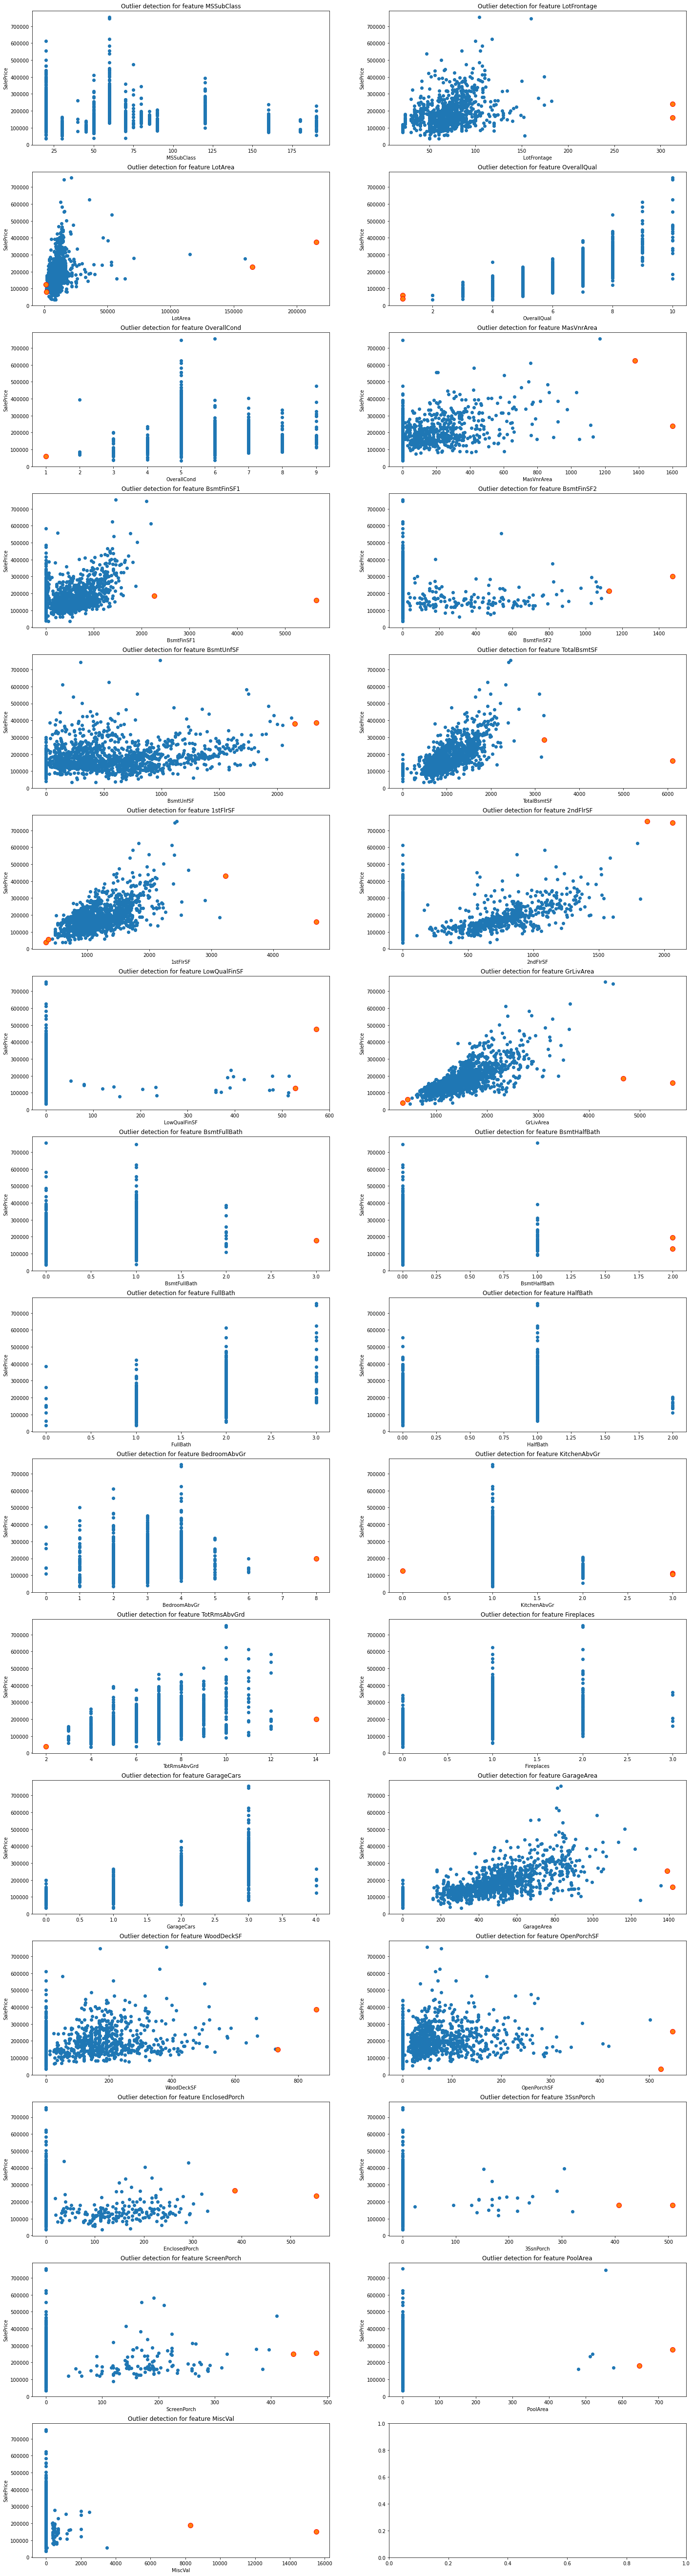

outliers: [934, 1298, 313, 335, 956, 1039, 375, 533, 375, 297, 1169, 523, 1298, 322, 542, 224, 477, 332, 1298, 496, 533, 705, 1298, 691, 1182, 170, 185, 523, 533, 1100, 1298, 738, 597, 954, 635, 48, 809, 954, 533, 635, 581, 1298, 53, 1459, 495, 1328, 197, 747, 55, 205, 1328, 1386, 810, 1423, 346, 1230]
unique_outliers: [523, 1039, 1423, 1169, 1298, 533, 542, 1182, 934, 297, 170, 809, 810, 48, 1328, 691, 1459, 53, 55, 313, 185, 954, 956, 705, 322, 581, 197, 332, 1100, 205, 335, 1230, 597, 346, 477, 224, 738, 1386, 747, 495, 496, 375, 635]
Shape of train data= (1460, 80)
Shape of train data= (1417, 80)


In [12]:
min_percentile= 0.001
max_percentile= 0.999
# Use numeric features
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
target= 'SalePrice'
nrows= int(np.ceil(len(features)/2))
ncols= 2 

def detect_and_remove_outliers(inline_delete= True):
    global train
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))
    outliers = []
    cnt = 0
    for row in range (0, nrows):
        for col in range (0, ncols):
            # df_outliers = outlier_detection_using_percentile(features[cnt])
            # Outlier detection using percentile
            min_thresold, max_thresold = train[features[cnt]].quantile([min_percentile, max_percentile])
            # print(f'outlier_detection_using_percentile()> min_thresold: {min_thresold}, max_thresold: {max_thresold}')
            # print (f'No of outliers below min_thresold: {len(train[train[feature] < min_thresold])}')
            # print (f'No of outliers above max_thresold: {len(train[train[feature] > max_thresold])}')
            df_outliers = train[(train[features[cnt]] < min_thresold) | (train[features[cnt]] > max_thresold)]

            # Updaing list of outliers
            outliers = outliers + df_outliers.index.tolist()

            # Plot feature vs target using scatter plot
            ax[row][col].scatter(x = train[features[cnt]], y= train[target])
     
            # Mark outlier records in same scatter plot
            ax[row][col].scatter(x= df_outliers[features[cnt]],  y=df_outliers[target], marker ="o", edgecolor ="red", s = 100)
            ax[row][col].set_xlabel(features[cnt])
            ax[row][col].set_ylabel(target)
            ax[row][col].set_title('Outlier detection for feature ' + features[cnt])

            if inline_delete: 
                # Drop the outliers inline
                # drop_outliers(df_outliers.index.tolist())
                # print(f'Shape of train data= {train.shape}')
                train = train.drop(df_outliers.index.tolist())
                train.reset_index(drop = True, inplace = True)
                # print(f'Shape of train data= {train.shape}')

            cnt = cnt + 1
            if cnt >= len(features):
                break
    plt.show()

    print(f'outliers: {outliers}')
    unique_outliers= list(set(outliers))
    print(f'unique_outliers: {unique_outliers}')
    
    if inline_delete == False: 
        # Drop the unique outliers from final list
        print(f'Shape of train data= {train.shape}')
        train = train.drop(unique_outliers)
        train.reset_index(drop = True, inplace = True)
        print(f'Shape of train data= {train.shape}')
        
        
detect_and_remove_outliers(inline_delete= False)

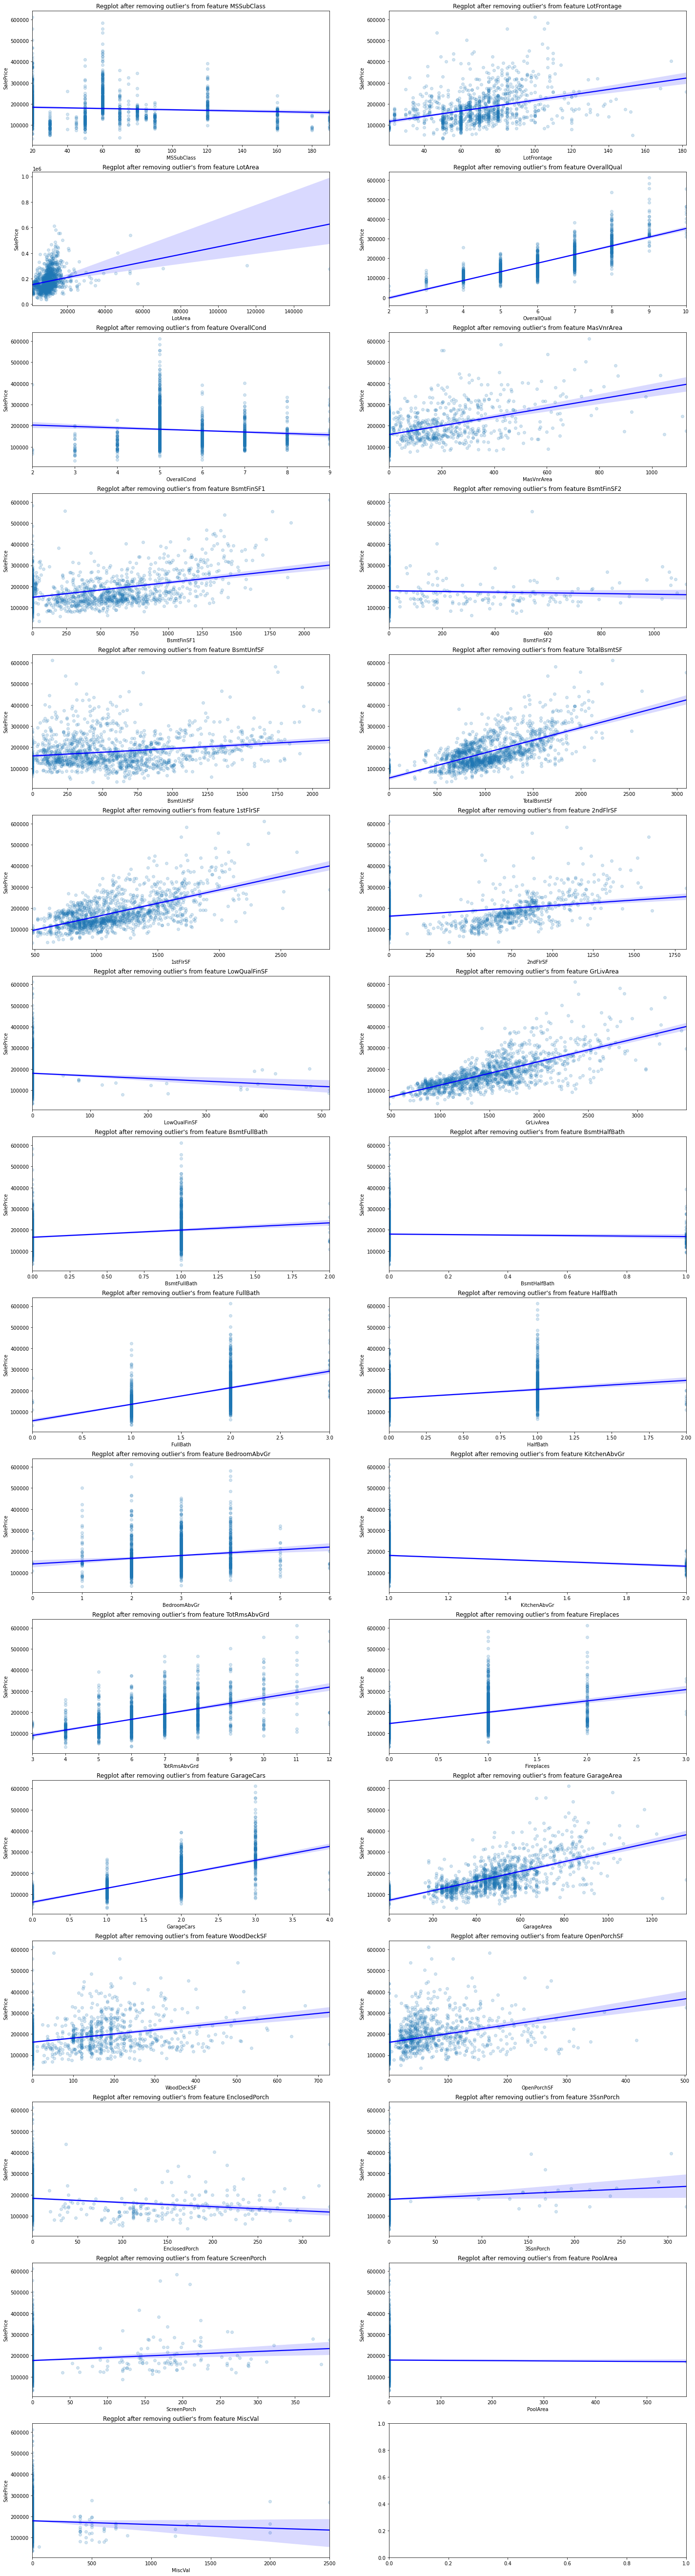

In [13]:
# Lets visulaize the feature(after droping outliers) and target relationship using Regplot
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (24, nrows * 6))

outliers = []
cnt = 0
for row in range (0, nrows):
    for col in range (0, ncols):
        sns.regplot(data=train, x = features[cnt], y= target, scatter_kws={'alpha':0.2}, line_kws={'color': 'blue'}, ax = ax[row,col]) # scatter_kws and line_kws used to pass additional keyword argument to change transparancy and line color
        ax[row,col].set_title("Regplot after removing outlier's from feature " + features[cnt], fontsize = 12)
        cnt = cnt + 1
        if cnt >= len(features):
            break
plt.show()

# Data Preprocessing
* So far we have good insights into our data and we understand the correlation between features and the target variables.
* In this step we are going to drop unuseful features, identify null values, fix the datatypes of the features and we will also group the features based on the data they contain.
* Since we have test data also available we will combine train and test sets, preprocess, and divide them again.

Note: Its not recommonded to combine train and test data for preprocessing, it may lead to data leakage. I am being lazy here!!

In [14]:
y_train = train.SalePrice
all_data = pd.concat((train,test)).reset_index(drop = True) #  Drops the current index of the DataFrame and replaces it with an index of increasing integers
all_data.drop(['SalePrice'], axis=1, inplace=True) # Delete SalePrice from all data
print('Shape of all_data= {}'.format(all_data.shape))
all_data.head()

Shape of all_data= (2876, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


## Delete Unuseful Features
* Before we start imputing missing values, lets first delete the unusefull features from the dataset.
* 'Utilities' feature contains almost all the values of one type of utility only. Since it wont be usefull in modeling we can drop this feature.
    ```
    AllPub    1459
    NoSeWa       1
    Name: Utilities, dtype: int64
    ```
* 'Street' feature also contains the unbalance data of type of road access to property. We can drop it.
    ```
    Pave    1454
    Grvl       6
    Name: Street, dtype: int64
    ```
* 'PoolQC' most of the data is missing for this feature, we can drop it.

In [15]:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (2876, 76)


## Fix DataTypes
* MSSubClass: Identifies the type of dwelling involved in the sale. Its data type is int64 and values are incremental order starting from 20 upto 190. If we keep it as it is then our model may give more importance to MSSubClass 190 houses over MSSubClass 20 houese. In order to avoid that we will change its data type to 'str' and treat this as categorical variable.
* YrSold: Contains year values like 2008, 2007, 2006, 2009, 2010. Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.
* MoSold: Since we have sufficient data for each value we will change its data type to 'str' and treat this as categorical variable.
* We are not changing the data type of 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt' to 'str'. They have linear relationship with SalePrice, model will benefit from this relationship instaed of converting it into categories. (Also we dont have sufficient training examples for each unique value)

*Note: If we encode time(here year) as numeric, then we will restrict our linear regression model to learn from its increase or decrease only. But if we encode the time as categorical then our model gets more flexibility to use this feature provided that we have sufficient data.*


In [16]:
for col in ('MSSubClass', 'YrSold', 'MoSold'):
    all_data[col] = all_data[col].astype(str)

## Check Mising Values

In [17]:
# Get the list of column that have null values
col_na = all_data.columns[all_data.isnull().any()]

# Get missing value count in each column
all_data_na_cnt = all_data[col_na].isnull().sum()

# Get missing values percentage for each column
all_data_na = (all_data[col_na].isnull().sum()/len(all_data)) * 100
#all_data_na = all_data_na.sort_values(ascending = False)
all_data_na = pd.DataFrame({'Total Null Val': all_data_na_cnt, 'Null Value %': all_data_na})
all_data_na = all_data_na.sort_values(by='Null Value %', ascending=False)
all_data_na

,Total Null Val,Null Value %
MiscFeature,2777,96.558
Alley,2682,93.255
Fence,2316,80.529
FireplaceQu,1405,48.853
LotFrontage,479,16.655
GarageCond,151,5.250
GarageYrBlt,151,5.250
GarageFinish,151,5.250
GarageQual,151,5.250
GarageType,149,5.181


## Visualizing Missing Values

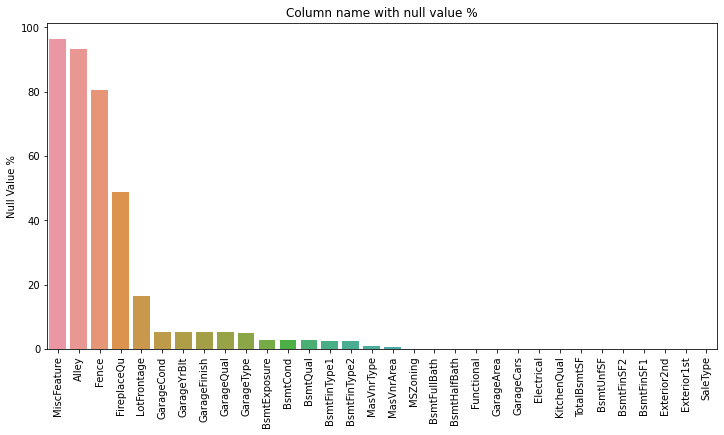

In [18]:
sns.barplot(x=all_data_na.index, y='Null Value %', data=all_data_na)
plt.xticks(rotation = 90) # For better visulaization of column names
plt.title('Column name with null value %')
plt.show()

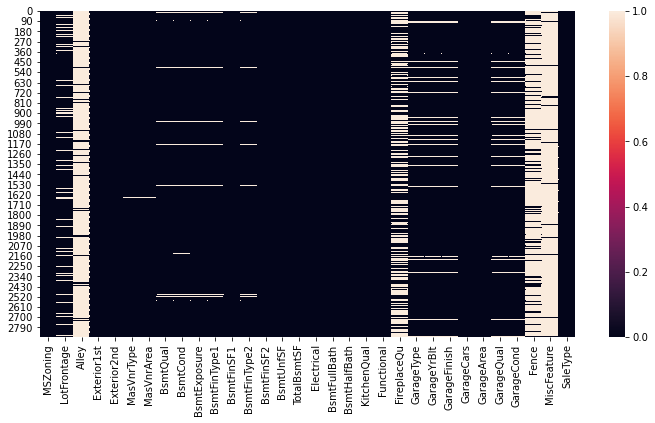

In [19]:
# Visualize missing values using heatmap. White lines represent missing values
sns.heatmap(all_data[col_na].isnull())
plt.show()

## Imputing missing values

### Replace with None
* We will replace the categorical ordinal as well as nominal features missing values with 'None'
* In case of nominal feature it will become one of the category and in case of ordinal feature it will be trated as least order value.
* Always try to use 'None' if null value percentage is higher, to avoid the imbalance data.

In [20]:
for col in ('MiscFeature', 'Alley','FireplaceQu', 'GarageFinish', 'GarageQual', 'Fence', 'GarageType', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')
    print(f'Feature: {col}, Null Count: {all_data[col].isnull().sum()}, Unique Values: {all_data[col].unique()}')

Feature: MiscFeature, Null Count: 0, Unique Values: ['None' 'Shed' 'Othr' 'Gar2']
Feature: Alley, Null Count: 0, Unique Values: ['None' 'Grvl' 'Pave']
Feature: FireplaceQu, Null Count: 0, Unique Values: ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Feature: GarageFinish, Null Count: 0, Unique Values: ['RFn' 'Unf' 'Fin' 'None']
Feature: GarageQual, Null Count: 0, Unique Values: ['TA' 'Fa' 'Gd' 'None' 'Po' 'Ex']
Feature: Fence, Null Count: 0, Unique Values: ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Feature: GarageType, Null Count: 0, Unique Values: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'None' 'Basment' '2Types']
Feature: GarageQual, Null Count: 0, Unique Values: ['TA' 'Fa' 'Gd' 'None' 'Po' 'Ex']
Feature: GarageCond, Null Count: 0, Unique Values: ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
Feature: BsmtQual, Null Count: 0, Unique Values: ['Gd' 'TA' 'Ex' 'None' 'Fa']
Feature: BsmtCond, Null Count: 0, Unique Values: ['TA' 'Gd' 'None' 'Fa' 'Po']
Feature: BsmtExposure, Null Count: 0, Unique Values: ['No' 'Gd' 'Mn' '

### Replace with Median
* **LotFrontage:** Linear feet of street connected to property. Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values by the median LotFrontage of the neighborhood.
* Since 'LotFrontage containes continuous data we are taking 'median' value.

In [21]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### Replace with 0
We can replace numerical features missing values with '0'


In [22]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

### Impute specific value

In [23]:
# As per the data description, assume 'Typ' home functionality unless deductions are warranted.
all_data['Functional'] = all_data['Functional'].fillna('Typ')

### Replace with Most Frequent Value
For low percentage of null values, we will use most frequent value to replace the categorical missing value.

In [24]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    print(f'Feature: {col}, Null Count: {all_data[col].isnull().sum()}, Unique Values: {all_data[col].unique()}')

Feature: MSZoning, Null Count: 0, Unique Values: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Feature: Electrical, Null Count: 0, Unique Values: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Feature: KitchenQual, Null Count: 0, Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
Feature: Exterior1st, Null Count: 0, Unique Values: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Feature: Exterior2nd, Null Count: 0, Unique Values: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Feature: SaleType, Null Count: 0, Unique Values: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


As of now we have updated all the missing values with relevant replacement. Lets again crosscheck for null values.

Shape of data: (2876, 76)
Count of null values: 0


<AxesSubplot:>

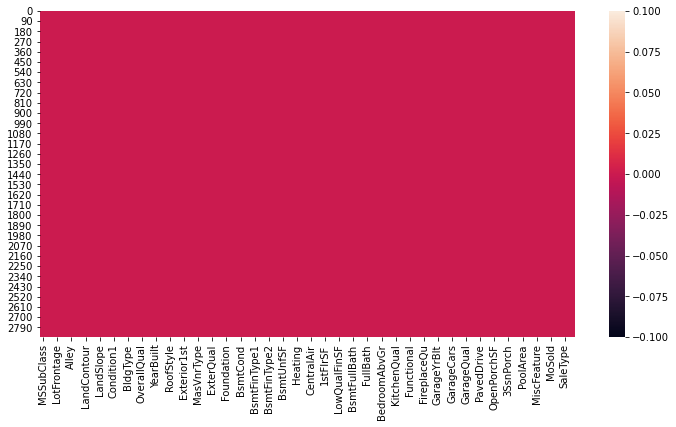

In [25]:
print(f'Shape of data: {all_data.shape}')
print(f'Count of null values: {all_data.isnull().sum().sum()}')
sns.heatmap(all_data.isnull())

There are not missing values and isnt that clean heatmap look good!!

# Feature Engineering


## Remove Multicollinear Features
* Method get_highest_vif_feature() will find all the features with VIF more than threshold value and return the feature with highest VIF
* Instead of removing all the features with VIF more than threshold value we will drop the feature with highest VIF value and recalculate the VIF for all the remaining features.
* We will repeat this step until no remaining features have a VIF larger than threshold value.
* Once we get the final list of multicolenear features we will verify it with Correlation Matrix results and only drop those features, which we are 100% sure wont help in modeling.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def get_highest_vif_feature(df, thresh=5):
    '''
    Ref: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
    
    Calculates VIF each feature in a pandas dataframe
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with features removed
    '''
   
    const = add_constant(df)
    print(f'Shape of data after adding const column: {const.shape}')
    cols = const.columns
    
    # Calculating VIF for each feature
    vif_df = pd.Series([ (variance_inflation_factor(const.values, i)) for i in range(const.shape[1]) ], index= const.columns).to_frame()
    
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]

    if vif_df.empty:
        print('DataFrame is empty!')
        return None
    else:
        print(f'\nFeatures above VIF threshold: {vif_df.to_dict()}')       
        # Feature with highest VIF value
        return list(vif_df.index)[0]
        print(f'Lets delete the feature with highest VIF value: {list(vif_df.index)[0]}')


# Selecting only numeric features
print(f'Shape of input data: {all_data.shape}')
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Calculating VIF for {len(numeric_feats)} numerical features")

df_numeric = all_data[numeric_feats]
print(f'Shape of df_numeric: {df_numeric.shape}')
    
feature_to_drop = None
feature_to_drop_list = []
while True:
    feature_to_drop = get_highest_vif_feature(df_numeric, thresh=5)
    print(f'feature_to_drop: {feature_to_drop}')
    if feature_to_drop is None:
        print('No more features to drop!')
        break
    else:
        feature_to_drop_list.append(feature_to_drop)
        df_numeric = df_numeric.drop(feature_to_drop, axis=1)
        print(f'Feature {feature_to_drop} droped from df_numeric')

print(f'\nfeature_to_drop_list: {feature_to_drop_list}')

Shape of input data: (2876, 76)
Calculating VIF for 33 numerical features
Shape of df_numeric: (2876, 33)
Shape of data after adding const column: (2876, 34)

Features above VIF threshold: {'VIF': {'LowQualFinSF': inf, 'BsmtFinSF1': inf, 'GrLivArea': inf, '2ndFlrSF': inf, '1stFlrSF': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF2': inf, 'GarageCars': 6.41257004220114, 'GarageArea': 5.547554454700556}}
feature_to_drop: LowQualFinSF
Feature LowQualFinSF droped from df_numeric
Shape of data after adding const column: (2876, 33)

Features above VIF threshold: {'VIF': {'BsmtFinSF1': inf, 'TotalBsmtSF': inf, 'BsmtUnfSF': inf, 'BsmtFinSF2': inf, 'GrLivArea': 134.78071462793523, '2ndFlrSF': 104.10620615392186, '1stFlrSF': 86.16805090528686, 'GarageCars': 6.412570042201159, 'GarageArea': 5.547554454700539}}
feature_to_drop: BsmtFinSF1
Feature BsmtFinSF1 droped from df_numeric
Shape of data after adding const column: (2876, 32)

Features above VIF threshold: {'VIF': {'GrLivArea': 134.780

Now lets compare the result of VIF with correlation matrix values.

* Features correlated with SalePrice are OverallQual(0.79), YearBuilt(0.52), YearRemodAdd(0.51), TotalBsmtSF(0.61), 1stFlrSF(0.61), GrLivArea(0.71), FullBath(0.56), TotRmsAbvGrd(0.53), GarageCars(0.64), GarageArea(0.62)
* Features not correlated with SalePrice are MSSubClass(-0.084), OverallCond(-0.078), BsmtFinSF1(-0.011), LowQualFinSF(-0.026), BsmtHalfBath(-0.017), KitchenAbvGrd(-0.14), EnclosedPorch(-0.13), MiscVal(-0.021), YrSold(-0.029)

Even though area features are correlated, we dont want to delete them. These features are very usefull to predict the sales price. Infact next during feature engineering we are going to add few more area features by combining existing features. Now from the list of features predicted by VIF we can only delete 'LowQualFinSF' for now.

In [27]:
print(f'Shape of traning data= {all_data.shape}')
all_data = all_data.drop(['LowQualFinSF'], axis= 1) # Default drop axis is 0 i.e. rows 
all_data.reset_index(drop = True, inplace = True)
print(f'Shape of traning data= {all_data.shape}')

Shape of traning data= (2876, 76)
Shape of traning data= (2876, 75)


## Numeric Feature Scaling
* In order to give every feature same importance we perform feature scaling. There are many technioques like Min-Max Scaler, Robust Scaler etc. to do feature scaling.
* Before we can finalize any scaling technique lets check the skewness of our numeric features. Skewness is the measure of degree of asymmetry of a distribution.
    * skewness = 0 : normally distributed.
    * skewness > 0 : more weight in the left tail of the distribution.
    * skewness < 0 : more weight in the right tail of the distribution.

In [28]:
#Lets check the count of numerical and categorical features
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

skew_features = all_data[numeric_feats].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_features})

print(f'Skew in numerical features. Shape of skewness: {skewness.shape}')
skewness.head(10)

# todo add histo and probability plot of skewed features

Number of categorical features: 43, Numerical features: 32
Skew in numerical features. Shape of skewness: (32, 1)


,Skew
MiscVal,26.079
PoolArea,25.089
3SsnPorch,10.528
LotArea,8.807
KitchenAbvGr,4.260
BsmtFinSF2,4.123
EnclosedPorch,3.964
BsmtHalfBath,3.849
ScreenPorch,3.830
MasVnrArea,2.421


* As we can see from above details that our data is skewed. Remember that Multivariate normality is one of the assumption for linear regression. Multivariate normality means that regression requires all its variables to be normal. By having skewed data we violate the assumption of normality.
* So we must choose the right method which will scale our features as well as maintain the multivariate normality.
* We will use a Box Cox transformation.
* A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. We use the scipy function **boxcox1p** which computes the Box-Cox transformation of 1+x. (log 0 is undefined)
* For each variable, a Box Cox transformation estimates the value lambda from -5 to 5 that maximizes the normality of the data using the equation below.
![boxcox-formula-1](https://www.statisticshowto.com/wp-content/uploads/2015/07/boxcox-formula-1.png)

* We are going to use **boxcox_normmax()** to find best λ value

In [29]:
# We will use threshold '0.5' to apply Box Cox transaformation.
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

# Use box-cox transformation to transform numeric values with high skew into normal distribution. 
# Here we are using 'boxcox_normmax()' function to compute optimal Box-Cox transform parameter(lmbda) for input data.
# We are using the default method(pearsonr) to determine the optimal transform parameter (lmbda) for boxcox1p
# boxcox1p compute the Box-Cox transformation of 1 + x. (log 0 is undefined)
for i in skew_index:
    all_data[i] = boxcox1p(all_data[i], stats.boxcox_normmax(all_data[i] + 1))

## Adding New Features
* Since area related features are very important to determine the house price, we will create new feature by name 'TotalSF' by adding 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'.
* Similarly we will create one more new feature by name 'TotalSF1' by adding 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF' and '2ndFlrSF'. Here 'BsmtFinSF1' and 'BsmtFinSF2' represent finished square feet of all area, thats why we are creating separate feature using it.
* Create new feature 'YrBltAndRemod' by adding 'YearBuilt' and 'YearRemodAdd'
* Create new feature 'TotalBathrooms' by adding all the bathrooms in the house.
* Create new feature 'TotalPorchSF' by adding all porch area.

In [30]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalSF1'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['YrBltAndRemod']= all_data['YearBuilt'] + all_data['YearRemodAdd']

all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

print(f'Shape all_data: {all_data.shape}')

Shape all_data: (2876, 80)


Now lets add new features based on the availability of the swimming pool, second floor, garage, basement and firepalce.

In [31]:
all_data['haspool'] = all_data['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(f'Shape all_data: {all_data.shape}')

Shape all_data: (2876, 85)


In [32]:
#Lets check the count of numerical and categorical features
cat_feats = all_data.dtypes[all_data.dtypes == "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
print(f"Number of categorical features: {len(cat_feats)}, Numerical features: {len(numeric_feats)}")

print(f"\nList of cetagorical features: { cat_feats.to_list() }\n\nList of numerical features: { numeric_feats.to_list() }")

Number of categorical features: 43, Numerical features: 42

List of cetagorical features: ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

List of numerical features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fi

In [33]:
cat_feats_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Heating', 'Foundation']
cat_feats_ordinal = ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','PavedDrive', 'Fence']

numeric_feats_cont= ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalSF', 'TotalSF1', 'YrBltAndRemod', 'TotalBathrooms', 'TotalPorchSF']
numeric_feats_ordinal= ['OverallQual', 'OverallCond']
numeric_feats_descrete= ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars','haspool', 'has2ndfloor', 'hasgarage', 'hasbsmt', 'hasfireplace']

print(f"Number of cat_feats_nominal: {len(cat_feats_nominal)}, cat_feats_ordinal: {len(cat_feats_ordinal)}, numeric_feats_cont: {len(numeric_feats_cont)}, numeric_feats_ordinal: {len(numeric_feats_ordinal)}, numeric_feats_descrete: {len(numeric_feats_descrete)} ")

Number of cat_feats_nominal: 18, cat_feats_ordinal: 25, numeric_feats_cont: 26, numeric_feats_ordinal: 2, numeric_feats_descrete: 14 


## Encoding Categorical Variables
* We will use **Manual Label Encoding** for ordinal categorical variables and **One Hot Encoding** for nominal categorical variables.
* Reason for doing manual label encoding for known order is, if we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost.
* Remember that for missing values we have added 'None' category, which we will encode with '0'.

In [34]:
# List of categorical ordinal feature
print(f'List of categorical ordinal features: {cat_feats_ordinal}')

all_data['Alley'].replace(to_replace = ['None', 'Grvl', 'Pave'], value = [0, 1, 2], inplace = True)
all_data['LotShape'].replace(to_replace = ['Reg', 'IR1', 'IR2', 'IR3'], value = [3, 2, 1,0], inplace = True)
all_data['LandContour'].replace(to_replace = ['Lvl', 'Bnk', 'Low', 'HLS'], value = [3, 2, 1,0], inplace = True)
all_data['LotConfig'].replace(to_replace = ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], value = [0, 3, 1, 2, 4], inplace = True)
all_data['LandSlope'].replace(to_replace = ['Gtl', 'Mod', 'Sev'], value = [2, 1, 0], inplace = True)
all_data['BldgType'].replace(to_replace = ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['RoofStyle'].replace(to_replace = ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], value = [4, 2, 3, 1, 5, 0], inplace = True)
all_data['RoofMatl'].replace(to_replace = ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv', 'WdShake', 'WdShngl'], value = [7, 6, 5, 4, 3, 2, 1, 0], inplace = True)
all_data['ExterQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
all_data['ExterCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['BsmtQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['BsmtCond'].replace(to_replace = ['Gd', 'TA', 'Fa', 'Po', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['BsmtExposure'].replace(to_replace = ['Gd', 'Av', 'Mn', 'No', 'None'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['BsmtFinType1'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
all_data['BsmtFinType2'].replace(to_replace = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
all_data['HeatingQC'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], value = [4, 3, 2, 1, 0], inplace = True)
all_data['KitchenQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa'], value = [3, 2, 1, 0], inplace = True)
all_data['Functional'].replace(to_replace = ['Typ', 'Min1', 'Min2', 'Mod',  'Maj1', 'Maj2', 'Sev'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
all_data['FireplaceQu'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
all_data['GarageType'].replace(to_replace = ['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'None'], value = [6, 5, 4, 3, 2, 1, 0], inplace = True)
all_data['GarageFinish'].replace(to_replace = ['Fin', 'RFn', 'Unf', 'None'], value = [3, 2, 1, 0], inplace = True)
all_data['GarageQual'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
all_data['GarageCond'].replace(to_replace = ['Ex', 'Gd', 'TA', 'Fa',  'Po', 'None'], value = [5, 4, 3, 2, 1, 0], inplace = True)
all_data['PavedDrive'].replace(to_replace = ['Y', 'P', 'N'], value = [2, 1, 0], inplace = True)
all_data['Fence'].replace(to_replace = ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], value = [4, 3, 2, 1, 0], inplace = True)

print(f'\nShape of all_data: {all_data.shape}')
all_data.head()

List of categorical ordinal features: ['Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence']

Shape of all_data: (2876, 85)


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,TotalSF,TotalSF1,YrBltAndRemod,TotalBathrooms,TotalPorchSF,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace
0,60,RL,26.854,20.736,0,3,3,0,2,CollgCr,...,1677.718,1363.432,4006,3.566,12.311,0,1,1,1,0
1,20,RL,31.332,21.302,0,3,3,3,2,Veenker,...,656.228,189.701,3952,2.377,59.027,0,0,1,1,1
2,60,RL,27.771,22.023,0,2,3,0,2,CollgCr,...,1726.401,1347.389,4003,3.566,10.070,0,1,1,1,1
3,70,RL,25.300,21.279,0,2,3,1,2,Crawfor,...,1482.587,1133.150,3885,2.028,25.247,0,1,1,1,1
4,60,RL,32.485,23.137,0,2,3,3,2,NoRidge,...,2115.639,1657.421,4000,3.566,58.748,0,1,1,1,1


Now lets use **One Hot Encoding** to convert categorical nominal features.

In [35]:
print(f'List of categorical nominal features: {cat_feats_nominal}')

List of categorical nominal features: ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Heating', 'Foundation']


In [36]:
# Get k-1 dummies to avoid multicollinearity
cat_feats_nominal_one_hot = pd.get_dummies(all_data[cat_feats_nominal], drop_first= True).reset_index(drop=True)

print(f'Shape of cat_feats_nominal_one_hot: {cat_feats_nominal_one_hot.shape}')
cat_feats_nominal_one_hot.head()

Shape of cat_feats_nominal_one_hot: (2876, 142)


,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


Now lets concat the one Hot Encoded categorcal nominal features with main data frame.

In [37]:
# First we need to drop the catgorical nominal columns from all_data
all_data = all_data.drop(cat_feats_nominal, axis= 'columns')

all_data = pd.concat([all_data, cat_feats_nominal_one_hot], axis='columns')
print(f'Shape of all_data: {all_data.shape}')
all_data.head()

Shape of all_data: (2876, 209)


,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,BldgType,OverallQual,OverallCond,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,26.854,20.736,0,3,3,0,2,4,7,3.865,...,1,0,0,0,0,0,1,0,0,0
1,31.332,21.302,0,3,3,3,2,4,6,5.758,...,1,0,0,0,0,1,0,0,0,0
2,27.771,22.023,0,2,3,0,2,4,7,3.865,...,1,0,0,0,0,0,1,0,0,0
3,25.300,21.279,0,2,3,1,2,4,7,3.865,...,1,0,0,0,0,0,0,0,0,0
4,32.485,23.137,0,2,3,3,2,4,8,3.865,...,1,0,0,0,0,0,1,0,0,0


Finally our data set is ready.  Lets separate the train and test datasets, so that we can use train dataset for training and test dataset for model evaluation.

In [38]:
train = all_data[:len(y_train)]
test = all_data[len(y_train):]
print(f'Shape of train: {train.shape}, test:{test.shape}')

Shape of train: (1417, 209), test:(1459, 209)


# Target Variable Analysis and Transformation
* SalePrice is our target variable.
* If we want to predict the target variables accuratly then first task is to understand the underlying behaviour of our target variable.
* Note that model can make more reliable predictions if our target variable is normally distributed.
* We will use both graphical and statastical methods to do normality test of our taret variable.

#### Graphical
'distplot' and 'probplot' to visualize the target variable distribution.

#### Statastical
We will use Skewness, Kurtosis and Shapiro-Wilk test for normality.
* Skewness assesses the extent to which a variable’s distribution is symmetrical. The thumb rule is,
    - If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
    - If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
    - If the skewness is less than -1 or greater than 1, the data are highly skewed.

* Kurtosis tells you the height and sharpness of the central peak, relative to that of a standard bell curve. The thumb rule is,
    - Kurtosis greater than +1 indicates distribution is too peaked. 
    - Kurtosis less than –1 indicates a distribution that is too flat.


*Note: The probability plot is a graphical technique for assessing whether or not a data set follows a given distribution such as the normal distribution. The data are plotted against a theoretical distribution in such a way that the points should form approximately a straight line. Departures from this straight line indicate departures from the specified distribution.*

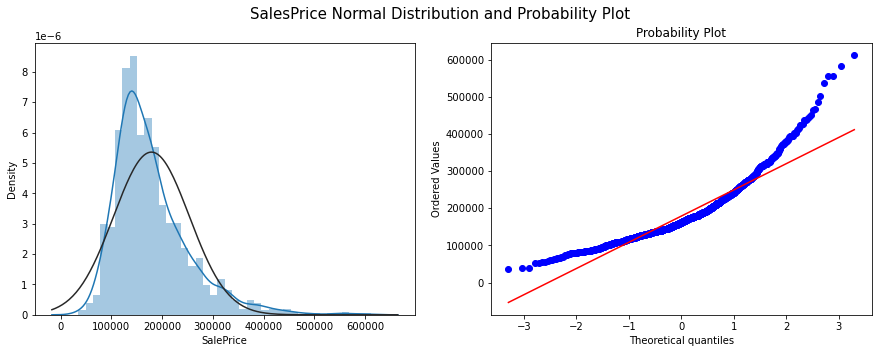

mean= 179017.01, sigma= 74475.26, mode= 140000.00)
Skewness: 1.5365779589032873
Kurtosis: 3.67111647898167


In [39]:
def distplot_probplot():    
    """
     Plot histogram using normal distribution and probability plot
    """
    
    fig, ax = plt.subplots(1,2, figsize= (15,5))
    fig.suptitle("SalesPrice Normal Distribution and Probability Plot", fontsize= 15)
    
    # Plot using normal distribution 
    sns.distplot(y_train, fit=stats.norm,label='test_label2', ax = ax[0])
      
    # Probabiloty plot
    stats.probplot(y_train, plot = ax[1])
    
    plt.show()  
    
    # Get the normal distribution fitted parameters
    (mu, sigma) = stats.norm.fit(y_train)
    print('mean= {:.2f}, sigma= {:.2f}, mode= {:.2f})'.format(mu, sigma, stats.mode(y_train)[0][0]))
    
def normality_stats():
    """
    Get Skewness, Kurtosis test stats.
    """

    print(f"Skewness: {abs(y_train).skew()}")
    print(f"Kurtosis: {abs(y_train).kurt()}")
    
distplot_probplot()
normality_stats()

From normal distribution plot its clear that mean is greater than mode, similarly from probability plot we can see that most of the obervations fall on the lower end of the Y axis. So we can conclude that that the target variable 'SalePrice' is right skewed. There are multiple transfromation technique to handle the skewed data. Lets try log transformation and visulaize the results.

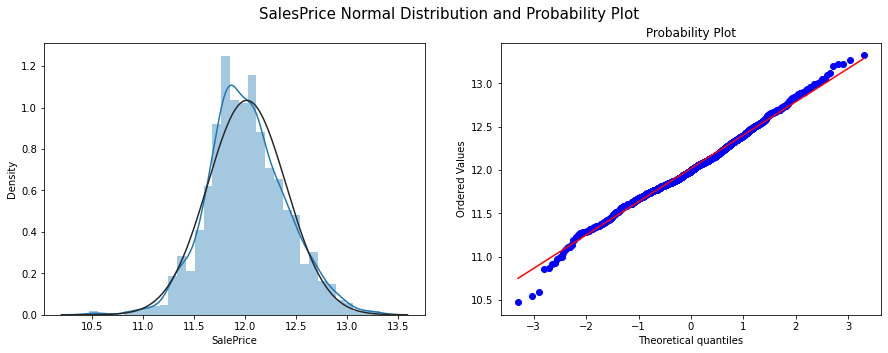

mean= 12.02, sigma= 0.39, mode= 11.85)
Skewness: 0.13289924539006392
Kurtosis: 0.5025734250088885


In [40]:
"""
 Instaed of log() we are using log1p() 
 log1p() calculates log(1 + x), so it takes of issue of log(0) error 
 For reverse transformation just use expm1()    
"""
y_train = np.log1p(y_train)

# Check again for normal distribution and probability plot
distplot_probplot()
normality_stats()

The skew seems now corrected and the data appears more normally distributed.

Now we are all set to start modeling!! Finally :)

# Modeling
## Import libraries
Import libraries required for data modeling

In [41]:
import re
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn import pipeline
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression,ElasticNet, Lasso, BayesianRidge, Ridge
from sklearn import svm
from sklearn.ensemble import  GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import  StackingCVRegressor

from sklearn.metrics import mean_squared_error

## Cross Validation
We willuse KFold cross validation with 5 folds.

In [42]:
n_folds= 5
random_state = 42
kf = KFold(n_splits= n_folds, random_state= random_state, shuffle=True)

## Evaluation Metric

In [43]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

cv_scores = []
cv_std = []
kaggle_public_score= []
models = ['linear_reg','bayesian_ridge_reg','lasso_reg','elastic_net_reg','ridge_reg','svr_reg', 'gbr_reg', 'lgbm_reg',
                   'xgb_reg','stacking_cv_reg']

def score_model(model_reg):
    score_model_reg = cv_rmse(model_reg)
    print(f'score_model_reg => mean: {score_model_reg.mean()}, std: {score_model_reg.std()}')
    cv_scores.append(score_model_reg.mean())
    cv_std.append(score_model_reg.std())

## Linear Models

### Linear Regression
* Ordinary least squares Linear Regression.
* LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
* There are now hyperparamters for this model

In [44]:
linear_reg = LinearRegression()
score_model(linear_reg)

# score_linear_reg => mean: 0.11905391313285207, std: 0.011760082267166596

score_model_reg => mean: 0.11905391313285207, std: 0.011760082267166596


### Bayesian Ridge Regression
*  BayesianRidge estimates a probabilistic model of the regression.
* Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.
* The advantages of Bayesian Regression are:
    * It adapts to the data at hand.
    * It can be used to include regularization parameters in the estimation procedure.
* The disadvantages of Bayesian regression include:
    * Inference of the model can be time consuming.

In [45]:
# score without hyperparameter tunning => mean: 0.10911046957971715, std: 0.008534453198805551

bayesian_ridge_reg = BayesianRidge(alpha_1= 2.104047761709729e-05,
                               alpha_2= 8.87111148542247e-06,
                               lambda_1= 0.9517616852006183,
                               lambda_2= 0.016369928482509982,
                               compute_score= False
                              )
score_model(bayesian_ridge_reg)

score_model_reg => mean: 0.10904334932157297, std: 0.008753303466899209


### Lasso

* Linear Model trained with L1 prior as regularizer (aka the Lasso)

* The optimization objective for Lasso is:
```
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
```

In [46]:
# Score without hyperparamter tuning => mean: 0.3762257424233845, std: 0.011988729415639152
lasso_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("lasso", Lasso(alpha= 0.0004225349823414949,
                                               max_iter=1e7,
                                               tol= 0.001,
                                               random_state= random_state))])

score_model(lasso_reg)

score_model_reg => mean: 0.10845133613928275, std: 0.008298203476244246


### Elastic Net
* Linear regression with combined L1 and L2 priors as regularizer.
* Minimizes the objective function:

    ```
    1 / (2 * n_samples) * ||y - Xw||^2_2
    + alpha * l1_ratio * ||w||_1
    + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
    ```

In [47]:
# Score without hypweparameter tuning => mean: 0.36638656427781546, std: 0.011399807086297639
elastic_net_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("elastic_net", ElasticNet(alpha=0.0005033042674715873,
                                                          l1_ratio=0.8201479505715717,
                                                          positive= True,
                                                          precompute=False,
                                                          selection='random',
                                                          max_iter=1e7,
                                                          tol= 0.001,
                                                          random_state= random_state))])

score_model(elastic_net_reg)

score_model_reg => mean: 0.10772054574234044, std: 0.008365606424826096


### Ridge
* Linear least squares with l2 regularization.
* Minimizes the objective function:
    ```
    ||y - Xw||^2_2 + alpha * ||w||^2_2
    ```
* This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [48]:
# Score without hyperparamter tunning => mean: 0.11142916126991283, std: 0.00998820053613384
ridge_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("ridge", Ridge(alpha= 12.773681311355642,
                                               random_state= random_state))])

score_model(ridge_reg)

score_model_reg => mean: 0.10825375541447765, std: 0.008277673253064801


## Support Vector Machines
* Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
* For regression problems we use Support Vector Regression method.
* The model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

In [49]:
# Score without hyperparameter tunning => mean: 0.12214361709700568, std: 0.010238209882594303
svr_reg = pipeline.Pipeline([("scaling", preprocessing.RobustScaler()),
                               ("svr", svm.SVR(C= 46,
                                               epsilon= 0.009019504329938493,
                                               gamma= 0.0003434802243340735))])

score_model(svr_reg)

score_model_reg => mean: 0.11010959563289809, std: 0.008794356705352228


## Ensemble Methods
* The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
* Two families of ensemble methods are usually distinguished:

    >   In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. Examples: Bagging methods, Forests of randomized trees,etc

    > By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Examples: AdaBoost, Gradient Tree Boosting, etc
        
* The module sklearn.ensemble provides methods for both classification and regression via gradient boosted decision trees.

### Gradient Boosting Regressor
* GBR supports a number of different loss functions for regression which can be specified via the argument loss; the default loss function for regression is least squares ('ls').


In [50]:
# Score without hyperparamter tunning => mean: 0.12159158898053346, std: 0.008598769231338886
gbr_reg = GradientBoostingRegressor(n_estimators=2501,
                                      learning_rate= 0.03221041191991256,
                                      random_state = random_state)
    
score_model(gbr_reg)

score_model_reg => mean: 0.12033970608370163, std: 0.010876293310585015


### LightGBM Regressor (Light Gradient Boosting Machine)
* LightGBM is a gradient boosting framework based on decision trees to increases the efficiency of the model and reduces memory usage.
* It uses two novel techniques: Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB) which fulfills the limitations of histogram-based algorithm that is primarily used in all GBDT (Gradient Boosting Decision Tree) frameworks.

In [51]:
# Score without hyperparamter tunning => mean: 0.12266167069892428, std: 0.00921411225172904
lgbm_reg = LGBMRegressor(objective='regression',
                          lambda_l1=2.6767384983882573e-06,
                          lambda_l2=1.3831822594594483e-07,
                          num_leaves=7,
                          feature_fraction=0.40037639693376437,
                          bagging_fraction=0.484921703394593,
                          bagging_freq=7,
                          min_child_samples=31,
                          learning_rate=0.00886005156619629,
                          n_estimators=3389,
                          max_bin=219,
                          min_data_in_leaf=2,
                          min_sum_hessian_in_leaf=0.0018863384096746397,
                          random_state= random_state)

score_model(lgbm_reg)

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

### XGB Regressor
* XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
* XGBoost stands for "Extreme Gradient Boosting" we can use it to solve classification and regression problems.
* The XGBoost is a popular supervised machine learning model with characteristics like computation speed, parallelization, and performance.

In [52]:
# Score without hyperparamter tunning => mean: 0.1334954528726264, std: 0.007132059271628562
xgb_reg = XGBRegressor(learning_rate=0.00922801668420645,
                         n_estimators=4492,
                         max_depth=4,
                         min_child_weight= 0.019476741626353912,
                         gamma=0.0038933017613795614,
                         subsample=0.3075828286669299,
                         colsample_bytree=0.16053941121623433,
                         scale_pos_weight=3,
                         reg_alpha=6.89051576939588e-05,
                         objective='reg:squarederror',
                         random_state= random_state)

score_model(xgb_reg)

score_model_reg => mean: 0.11398366387609016, std: 0.007492421714729506


## Model Stacking
### Stacking CV Regressor
* An ensemble-learning meta-regressor for stacking regression.
* Stacking is an ensemble learning technique to combine multiple regression models via a meta-regressor. 
* The StackingCVRegressor extends the standard stacking algorithm (implemented as StackingRegressor) using out-of-fold predictions to prepare the input data for the level-2 regressor.
* In the standard stacking procedure, the first-level regressors are fit to the same training set that is used prepare the inputs for the second-level regressor, which may lead to overfitting. The StackingCVRegressor, however, uses the concept of out-of-fold predictions: the dataset is split into k folds, and in k successive rounds, k-1 folds are used to fit the first level regressor. In each round, the first-level regressors are then applied to the remaining 1 subset that was not used for model fitting in each iteration. The resulting predictions are then stacked and provided -- as input data -- to the second-level regressor. After the training of the StackingCVRegressor, the first-level regressors are fit to the entire dataset for optimal predicitons.
* Ref. http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor/

![StackingCVRegressor](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingCVRegressor_files/stacking_cv_regressor_overview.png)

In [53]:
estimators = ( linear_reg, svr_reg, bayesian_ridge_reg, ridge_reg, lasso_reg, elastic_net_reg, gbr_reg, lgbm_reg, xgb_reg )
final_estimator = xgb_reg
    
stacking_cv_reg = StackingCVRegressor(regressors= estimators,
                                  meta_regressor = final_estimator,
                                  use_features_in_secondary= True,
                                  random_state= random_state)


score_model_reg = np.sqrt(-cross_val_score(stacking_cv_reg, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
print(f'score_model_reg => mean: {score_model_reg.mean()}, std: {score_model_reg.std()}')
cv_scores.append(score_model_reg.mean())
cv_std.append(score_model_reg.std())

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

## Model Blending

In [54]:
models_with_weights = {linear_reg: 0.005,
                       svr_reg: 0.005,
                       bayesian_ridge_reg: 0.005,
                       ridge_reg: 0.05,
                       lasso_reg: 0.1,
                       elastic_net_reg: 0.1,
                       gbr_reg: 0.1,
                       lgbm_reg: 0.1,
                       xgb_reg: 0.1,
                       stacking_cv_reg: 0.435}

# Contains predicted values for SalePrice
blended_train_pred = pd.DataFrame()
blended_test_pred = pd.DataFrame()
for model, weight in models_with_weights.items():
    # print(f"Model: {str(model)}, Weight: {weight}")    
    if re.search('StackingCVRegressor', str(model), re.I):
        # For stacking_cv model we will pass 'train.values' and 'test.values', To avoid error : ValueError: feature_names mismatch:
        # Ref. https://datascience.stackexchange.com/questions/19575/xgbclassifier-error-valueerror-feature-names-mismatch
        model.fit(train.values, y_train)
        blended_train_pred[model] = weight * model.predict(train.values)
        blended_test_pred[model] = weight * model.predict(test.values)
    else:
        model.fit(train, y_train)
        blended_train_pred[model] = weight * model.predict(train)
        blended_test_pred[model] = weight * model.predict(test)
        
print(f'blended_train_pred.shape: {blended_train_pred.shape}')
print(f'blended_test_pred.shape: {blended_test_pred.shape}')

# Find score using full training data
train_score = rmse(y_train, blended_train_pred.sum(axis='columns'))
print(f'train score: {train_score}')

# Predict on test data
test_pred = np.floor(np.expm1 (blended_test_pred.sum(axis='columns') )) # Contains predicted values for SalePrice

[LightGBM] [Warning] feature_fraction is set=0.40037639693376437, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40037639693376437
[LightGBM] [Warning] lambda_l1 is set=2.6767384983882573e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6767384983882573e-06
[LightGBM] [Warning] bagging_fraction is set=0.484921703394593, subsample=1.0 will be ignored. Current value: bagging_fraction=0.484921703394593
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.0018863384096746397, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.0018863384096746397
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=31 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=1.3831822594594483e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3831822594594483e-07
[LightGBM] [

In [55]:
def create_submission_file(submission_file_name, predications, train_score):
    submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
    submission.iloc[:, 1] = predications

    file_name = submission_file_name + '_ts_' + str(np.round(train_score, 4)) + '.csv'
   
    submission.to_csv(file_name, index=False)
    print(f"create_submission_file()> Submission file {file_name} saved")
    return file_name


file_name = create_submission_file("kaggle_blending_linear_model", test_pred, train_score)

create_submission_file()> Submission file kaggle_blending_linear_model_ts_0.0526.csv saved


In [56]:
submission = pd.read_csv('/kaggle/working/' + file_name)
submission.head()

,Id,SalePrice
0,1461,121390.000
1,1462,162606.000
2,1463,185889.000
3,1464,197731.000
4,1465,186944.000


# To Download the Submission File

In [57]:
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = file_name):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
#df = pd.DataFrame(np.random.randn(50, 4), columns=list('ABCD'))

# create a link to download the dataframe
create_download_link(submission)

# ↓ ↓ ↓  download link! ↓ ↓ ↓ 